In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import gc
import seaborn as sns
from datetime import datetime
from datetime import date

key_1=pd.read_csv('key_1.csv')
print("no of null values ",key_1.isnull().any().sum())
key_1.head()

In [ ]:
sample=pd.read_csv('sample_submission_1.csv')
print("no of null values ",sample.isnull().any().sum())
sample.head()

del sample,key_1
gc.collect()              # Release memory 

In [2]:
train=pd.read_csv('train_1.csv')
train.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0        26.0  ...        32.0        63.0        15.0        26.0   
1        10.0  ...        17.0        42.0        28.0        15.0   
2         4.0  ...         3.0         1.0         1.0         7.0   
3        11.0  ...        32.0        10.0        26.0        27.0   
4         NaN  ...        48.0         9.0        25.0        13.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  

[5 rows x 551 columns]

In [2]:
train=pd.read_csv('train_2.csv')
train.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2017-09-01  2017-09-02  2017-09-03  2017-09-04  \
0        26.0  ...        19.0        33.0        33.0        18.0   
1        10.0  ...        32.0        30.0        11.0        19.0   
2         4.0  ...         6.0         6.0         7.0         2.0   
3        11.0  ...         7.0        19.0        19.0         9.0   
4         NaN  ...        16.0        16.0        19.0         9.0   

   2017-09-05  2017-09-06  2017-09-07  2017-09-08  2017-09-09  2017-09-10  
0        16.0        27.0        29.0        23.0        54.0        38.0  
1        54.0        25.0        26.0        23.0        13.0        81.0  
2         4.0         7.0         3.0         4.0         7.0         6.0  
3         6.0        16.0        19.0        30.0        38.0         4.0  
4        20.0        23.0        28.0        14.0         8.0         7.0  

[5 rows x 804 columns]

In [6]:
def reduce_mem_usage(props):                                           #https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [12]:
train,na=reduce_mem_usage(train)

Memory usage of properties dataframe is : 609.8154373168945  MB
******************************
Column:  2015-07-01
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-07-02
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-07-03
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-07-04
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-07-05
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-07-06
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-07-07
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-07-08
dty

dtype after:  uint32
******************************
******************************
Column:  2015-09-04
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-09-05
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-09-06
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-09-07
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-09-08
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-09-09
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-09-10
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-09-11
dtype before:  

dtype after:  uint32
******************************
******************************
Column:  2015-11-10
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-11-11
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-11-12
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-11-13
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-11-14
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-11-15
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-11-16
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2015-11-17
dtype before:  

dtype after:  uint32
******************************
******************************
Column:  2016-01-16
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-01-17
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-01-18
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-01-19
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-01-20
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-01-21
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-01-22
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-01-23
dtype before:  

dtype after:  uint32
******************************
******************************
Column:  2016-03-22
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-03-23
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-03-24
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-03-25
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-03-26
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-03-27
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-03-28
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-03-29
dtype before:  

dtype after:  uint32
******************************
******************************
Column:  2016-05-28
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-05-29
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-05-30
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-05-31
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-06-01
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-06-02
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-06-03
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-06-04
dtype before:  

dtype after:  uint32
******************************
******************************
Column:  2016-08-02
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-08-03
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-08-04
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-08-05
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-08-06
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-08-07
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-08-08
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-08-09
dtype before:  

dtype after:  uint32
******************************
******************************
Column:  2016-10-08
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-10-09
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-10-10
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-10-11
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-10-12
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-10-13
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-10-14
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-10-15
dtype before:  

******************************
******************************
Column:  2016-12-13
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-12-14
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-12-15
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-12-16
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-12-17
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-12-18
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-12-19
dtype before:  float64
dtype after:  uint32
******************************
******************************
Column:  2016-12-20
dtype before:  float64
dtype after: 

In [3]:
train_flattened = pd.melt(train[list(train.columns[-50:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')
train_flattened['date'] = train_flattened['date'].astype('datetime64[ns]')
train_flattened['weekend'] = ((train_flattened.date.dt.dayofweek) // 5 == 1).astype(float)

In [4]:
train_flattened.head()

Page       date  Visits  \
0            2NE1_zh.wikipedia.org_all-access_spider 2016-11-12    13.0   
1             2PM_zh.wikipedia.org_all-access_spider 2016-11-12    12.0   
2              3C_zh.wikipedia.org_all-access_spider 2016-11-12     6.0   
3         4minute_zh.wikipedia.org_all-access_spider 2016-11-12    38.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s... 2016-11-12    13.0   

   weekend  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0

In [5]:
# Median by page
df_median = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].median())
df_median.columns = ['median']

# Average by page
df_mean = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].mean())
df_mean.columns = ['mean']

# Merging data
train_flattened = train_flattened.set_index('Page').join(df_mean).join(df_median)

In [6]:
train_flattened.reset_index(drop=False,inplace=True)
train_flattened['weekday'] = train_flattened['date'].apply(lambda x: x.weekday())
train_flattened['year']=train_flattened.date.dt.year 
train_flattened['month']=train_flattened.date.dt.month 
train_flattened['day']=train_flattened.date.dt.day
train_flattened.head()

Page       date  Visits  weekend  \
0  !vote_en.wikipedia.org_all-access_all-agents 2016-11-12     2.0      1.0   
1  !vote_en.wikipedia.org_all-access_all-agents 2016-11-13     2.0      1.0   
2  !vote_en.wikipedia.org_all-access_all-agents 2016-11-14     4.0      0.0   
3  !vote_en.wikipedia.org_all-access_all-agents 2016-11-15     8.0      0.0   
4  !vote_en.wikipedia.org_all-access_all-agents 2016-11-16     3.0      0.0   

       mean  median  weekday  year  month  day  
0  2.836735     2.0        5  2016     11   12  
1  2.836735     2.0        6  2016     11   13  
2  2.836735     2.0        0  2016     11   14  
3  2.836735     2.0        1  2016     11   15  
4  2.836735     2.0        2  2016     11   16

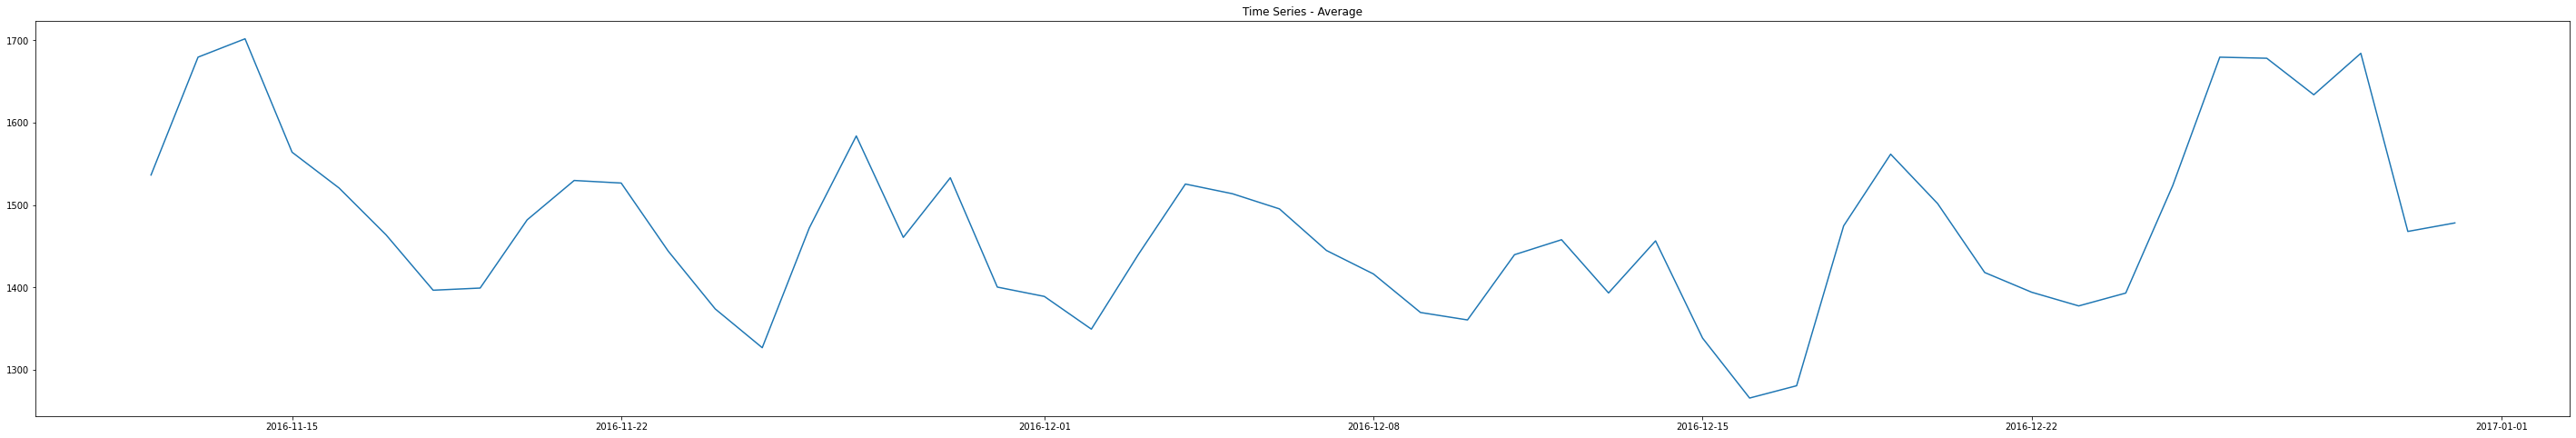

In [7]:
plt.figure(figsize=(50, 8))
mean_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].mean()
plt.plot(mean_group)
plt.title('Time Series - Average')
plt.show()

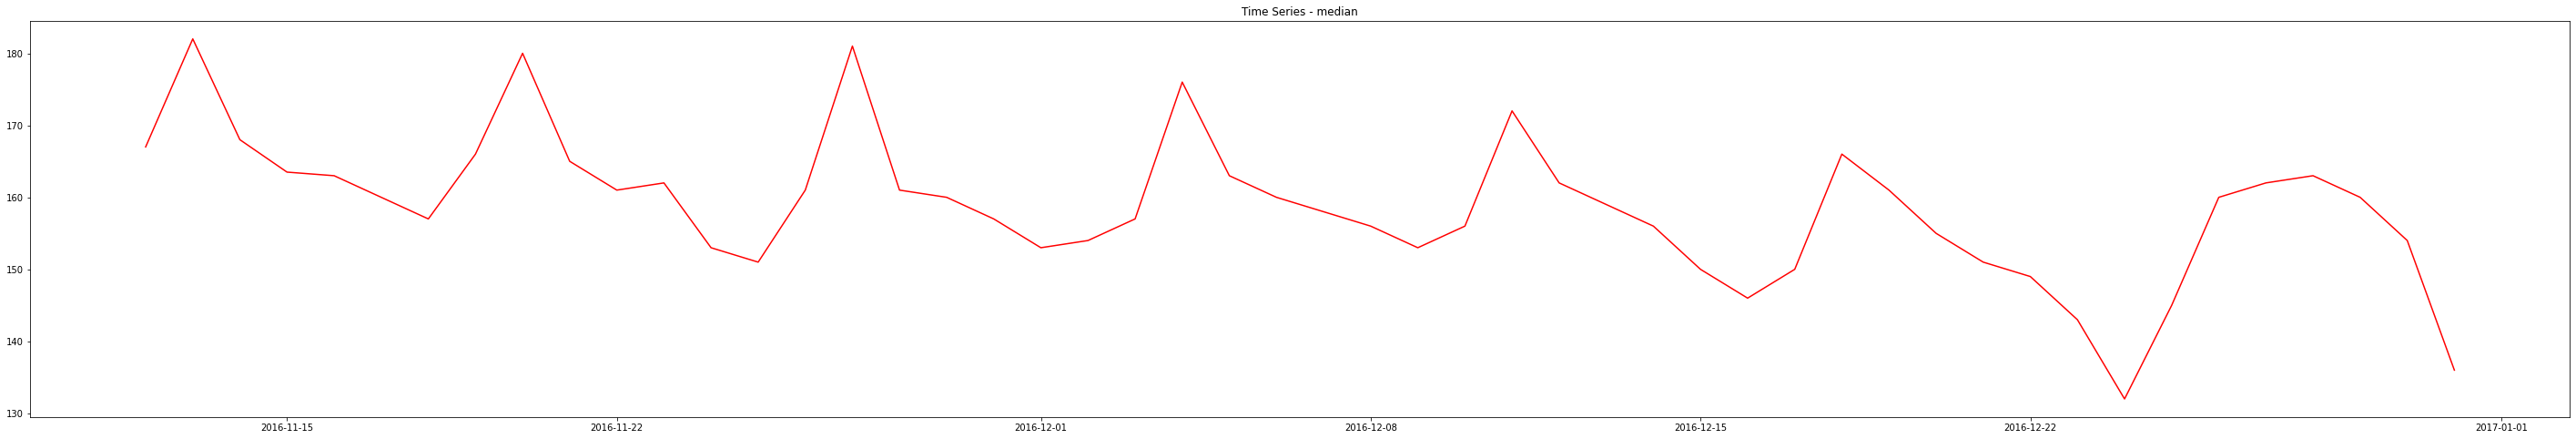

In [8]:
plt.figure(figsize=(50, 8))
median_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].median()
plt.plot(median_group, color = 'r')
plt.title('Time Series - median')
plt.show()

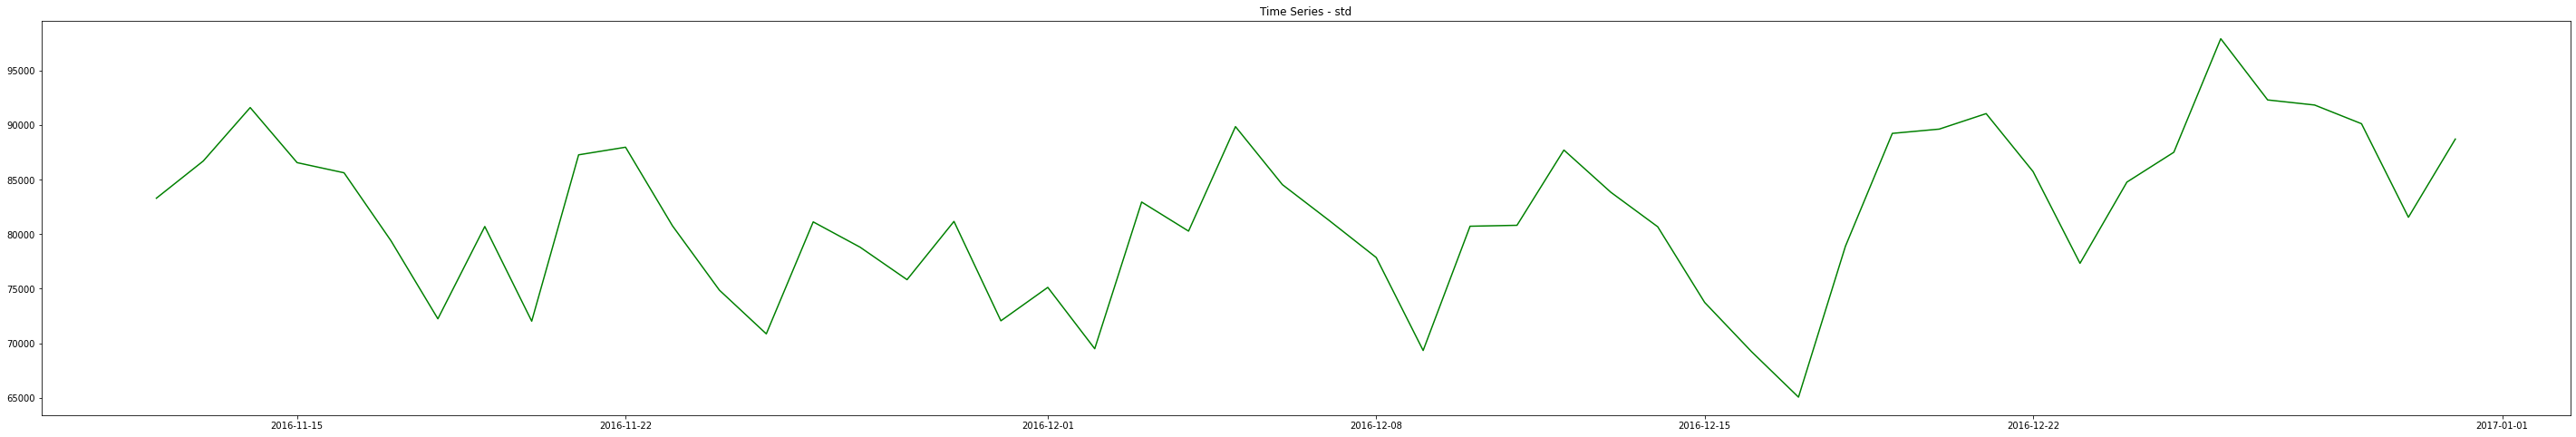

In [9]:
plt.figure(figsize=(50, 8))
std_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].std()
plt.plot(std_group, color = 'g')
plt.title('Time Series - std')
plt.show()

In [10]:
# For the next graphics
train_flattened['month_num'] = train_flattened['month']
train_flattened['month'].replace('11','11 - November',inplace=True)
train_flattened['month'].replace('12','12 - December',inplace=True)

train_flattened['weekday_num'] = train_flattened['weekday']
train_flattened['weekday'].replace(0,'01 - Monday',inplace=True)
train_flattened['weekday'].replace(1,'02 - Tuesday',inplace=True)
train_flattened['weekday'].replace(2,'03 - Wednesday',inplace=True)
train_flattened['weekday'].replace(3,'04 - Thursday',inplace=True)
train_flattened['weekday'].replace(4,'05 - Friday',inplace=True)
train_flattened['weekday'].replace(5,'06 - Saturday',inplace=True)
train_flattened['weekday'].replace(6,'07 - Sunday',inplace=True)

In [11]:
train_group = train_flattened.groupby(["month", "weekday"])['Visits'].mean().reset_index()
train_group = train_group.pivot('weekday','month','Visits')
train_group.sort_index(inplace=True)

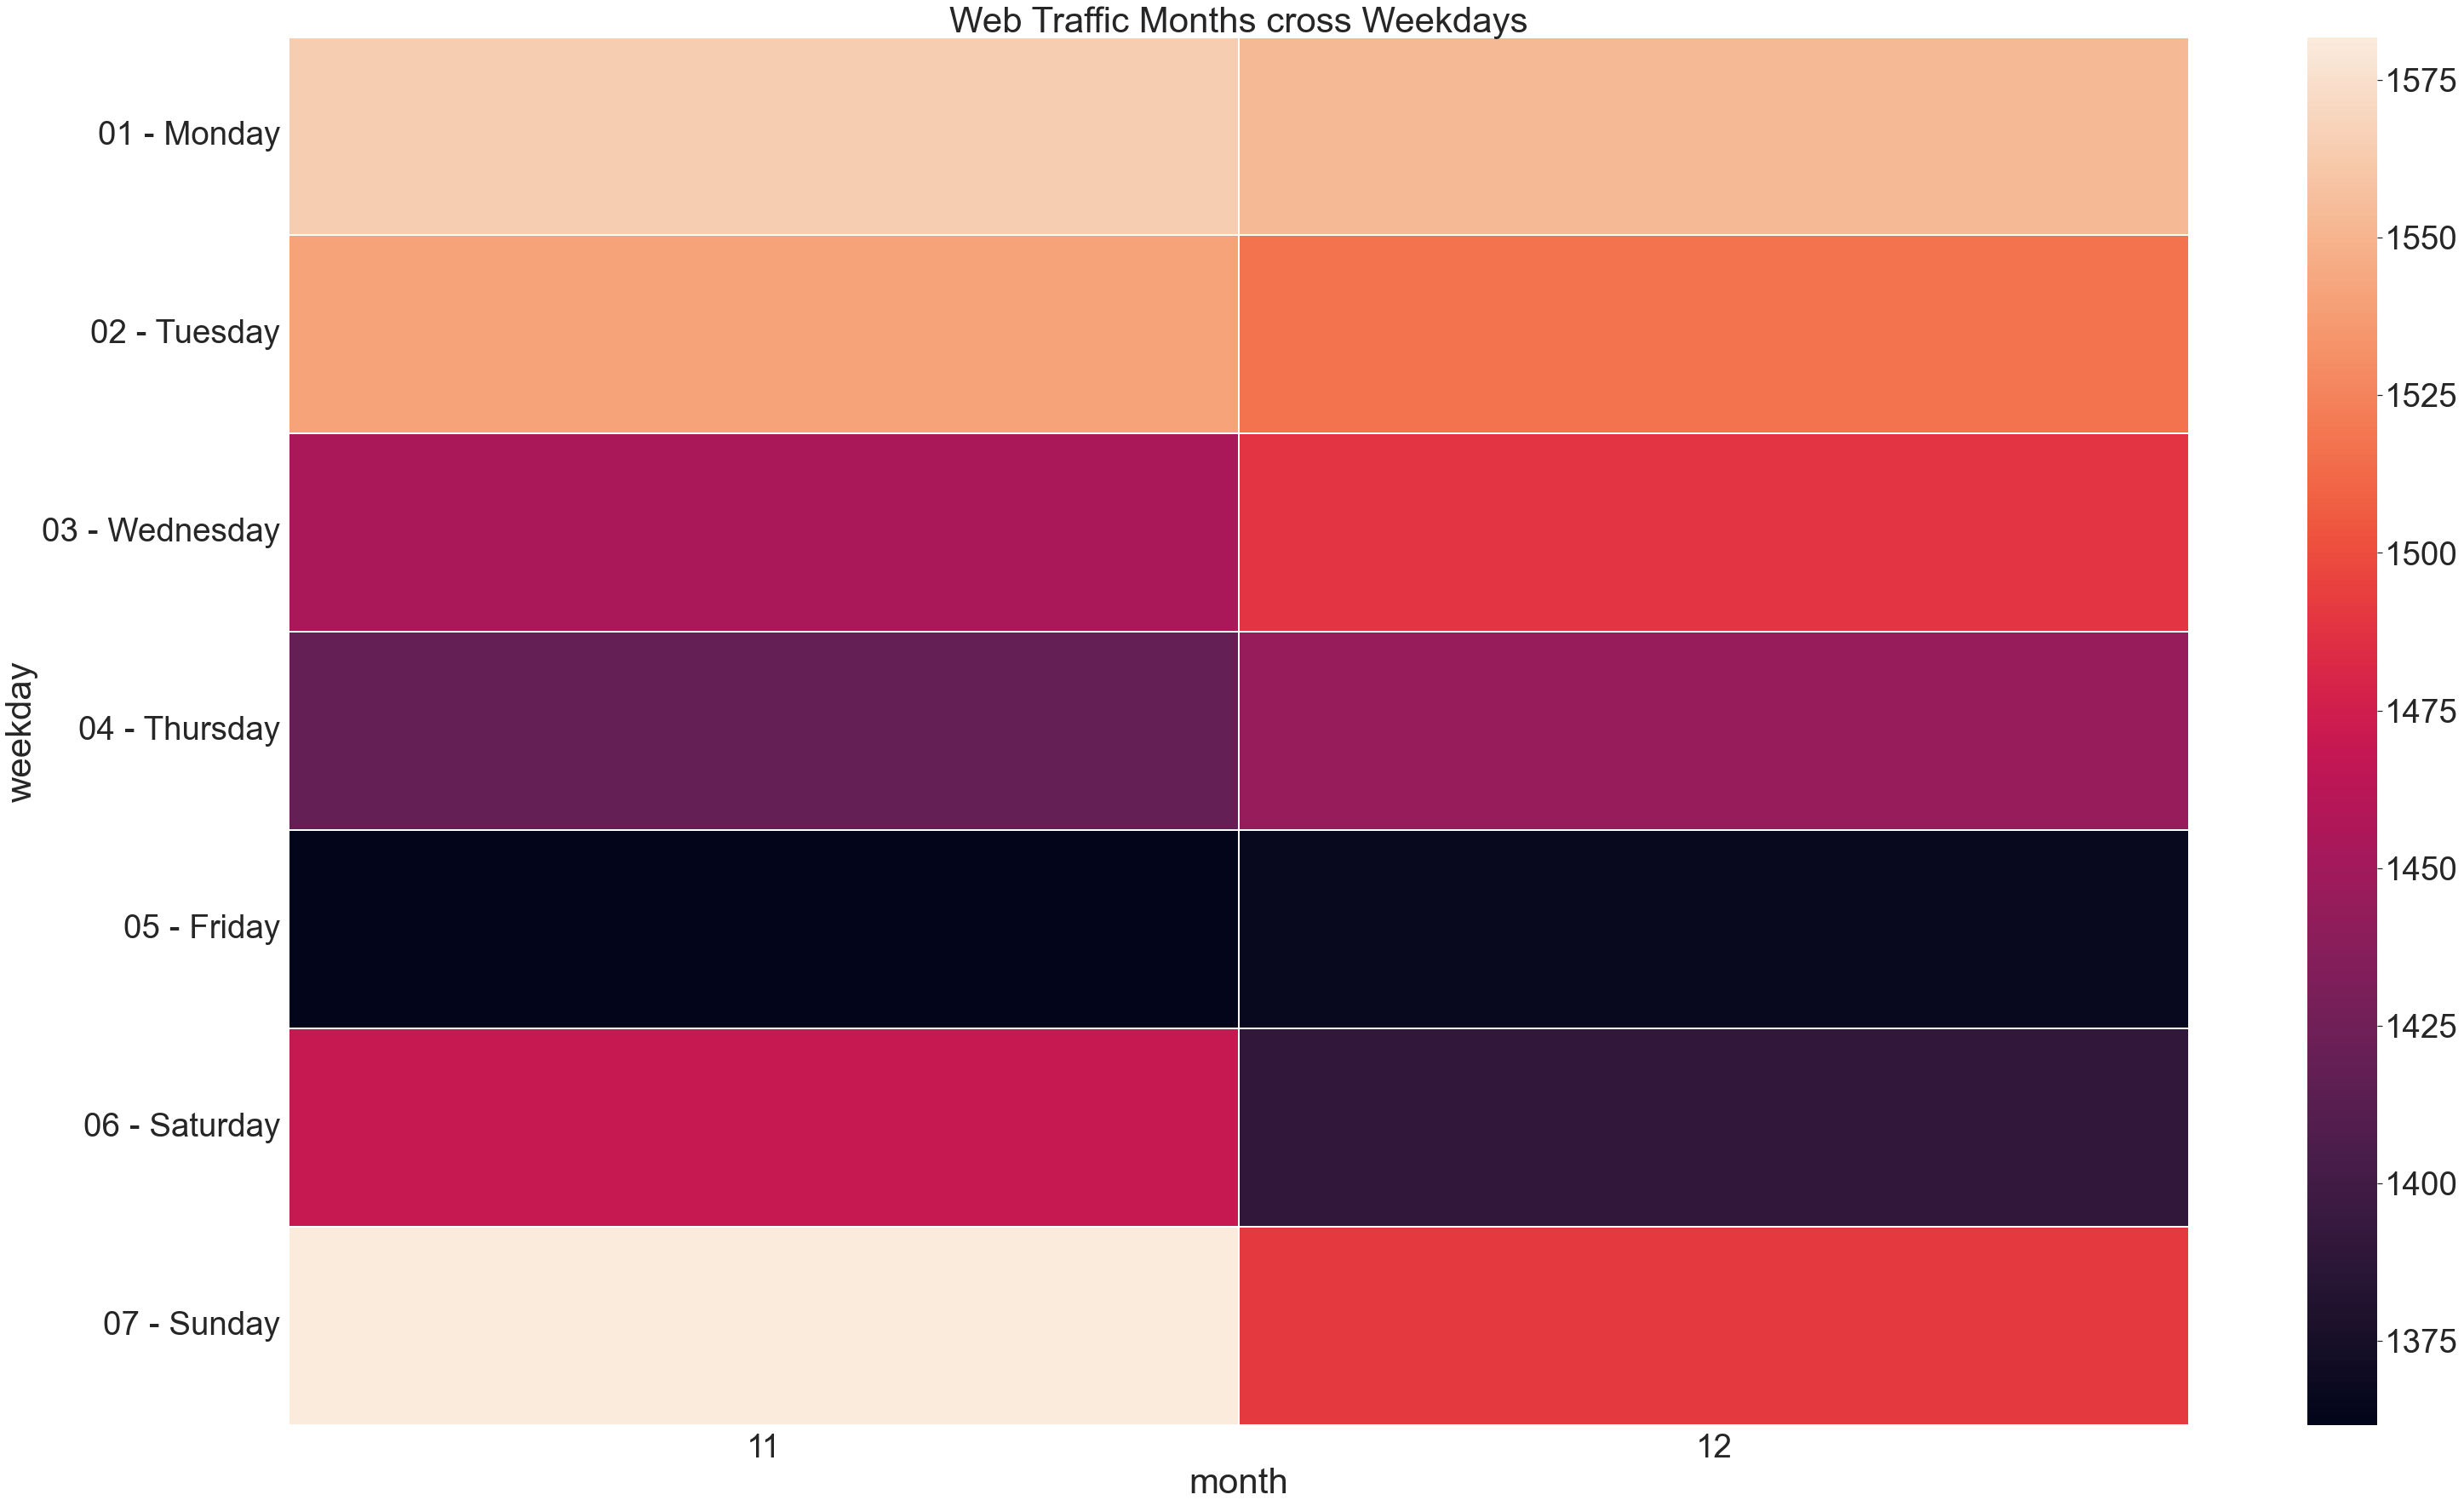

In [13]:
sns.set(font_scale=3.5) 

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(train_group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross Weekdays')
plt.show()

In [14]:
train_day = train_flattened.groupby(["month", "day"])['Visits'].mean().reset_index()
train_day = train_day.pivot('day','month','Visits')
train_day.sort_index(inplace=True)
train_day.dropna(inplace=True)

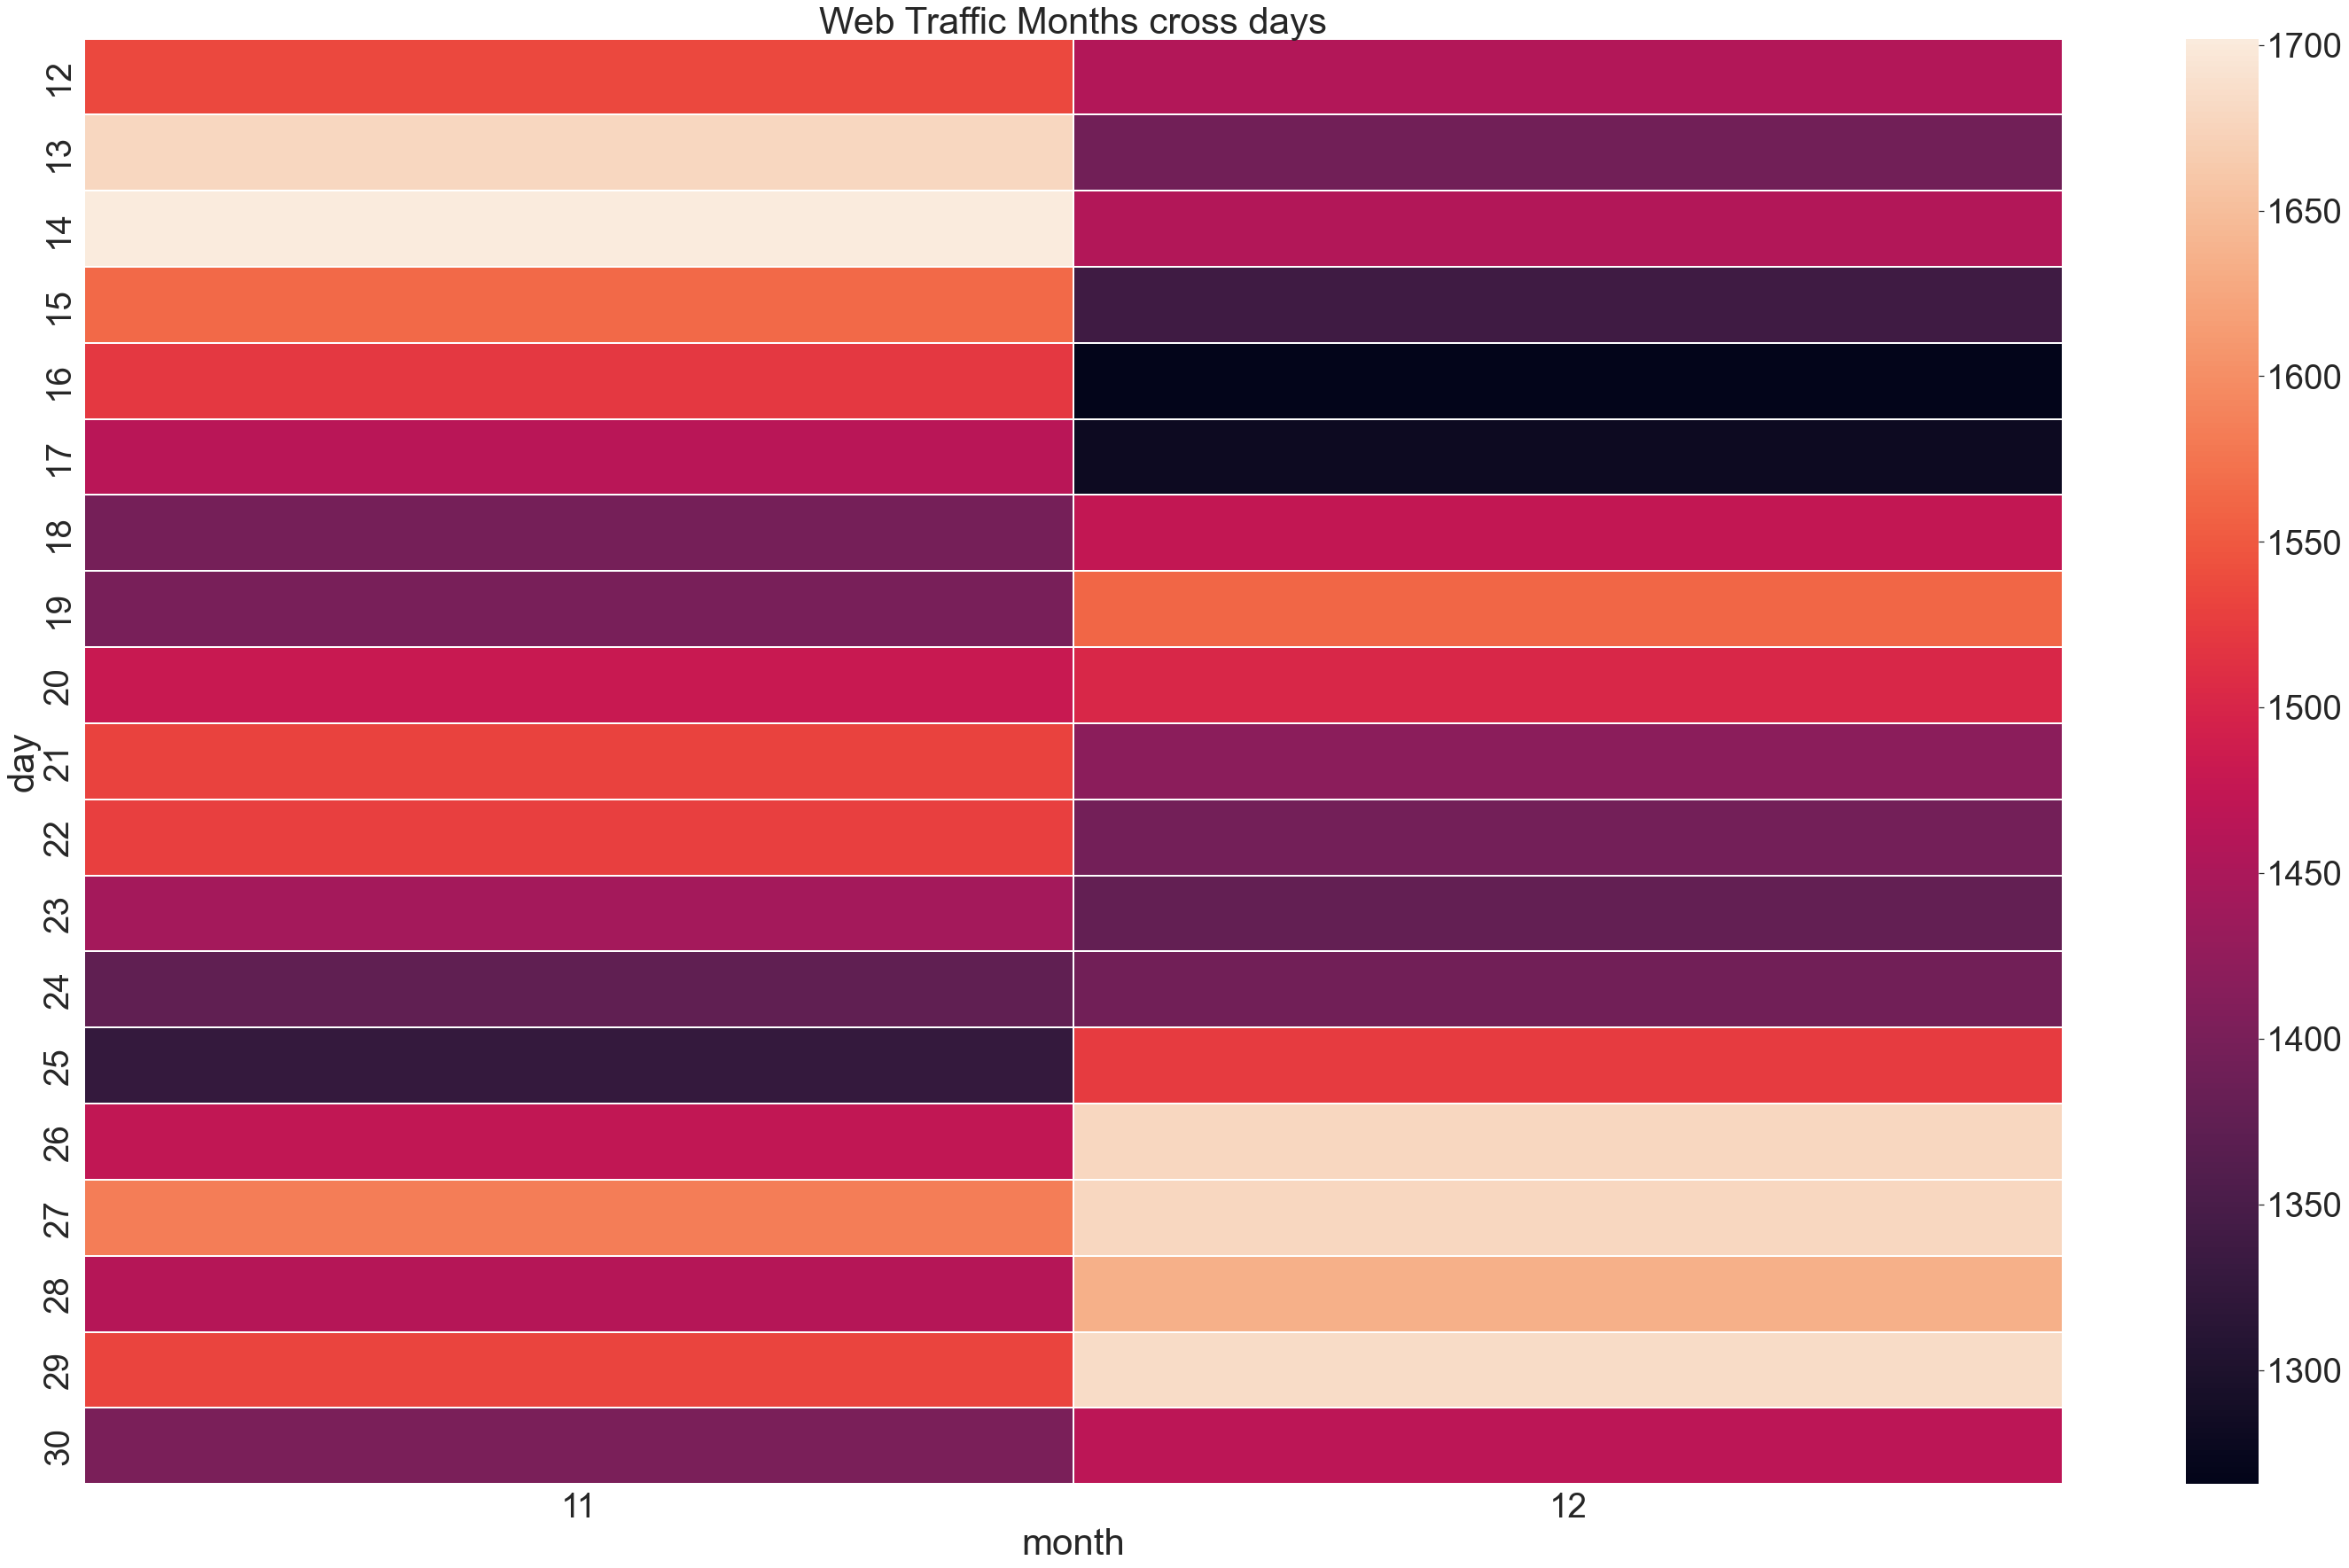

In [15]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(train_day, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross days')
plt.show()


In [3]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'na'

train['lang'] = train.Page.map(get_language)

from collections import Counter

print(Counter(train.lang))

Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [4]:
lang_sets = {}
lang_sets['en'] = train[train.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train[train.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train[train.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train[train.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train[train.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train[train.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train[train.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train[train.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

In [ ]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

en


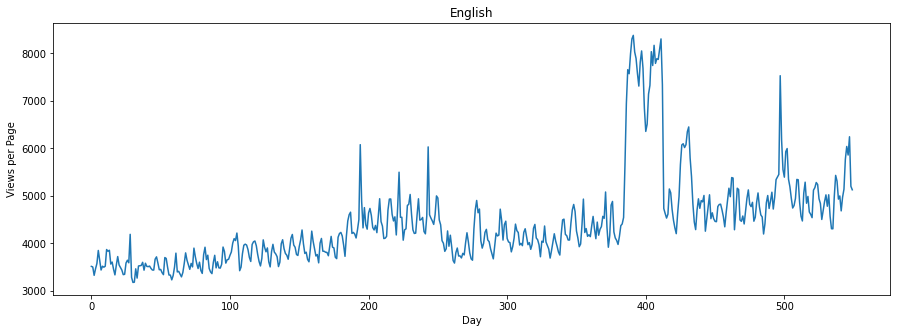

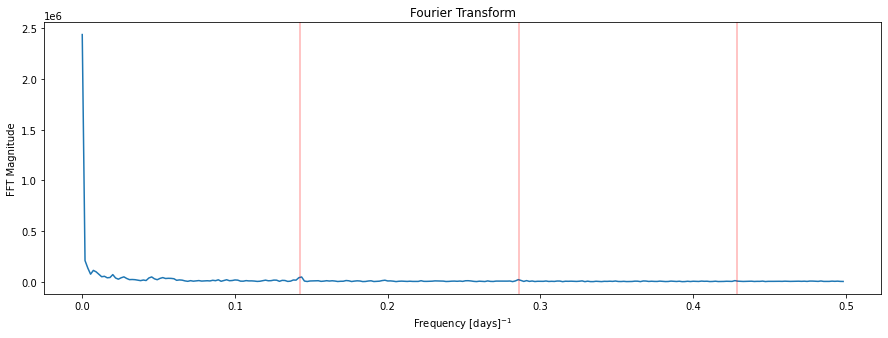

ja


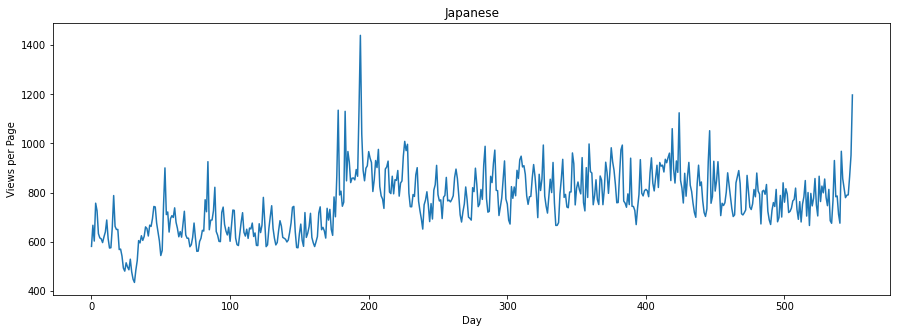

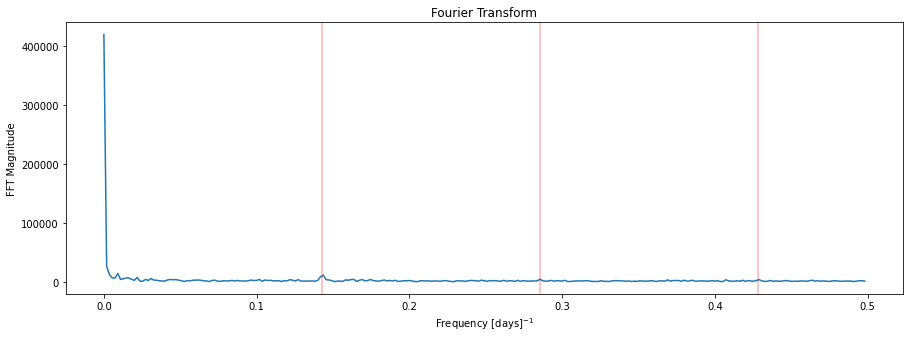

de


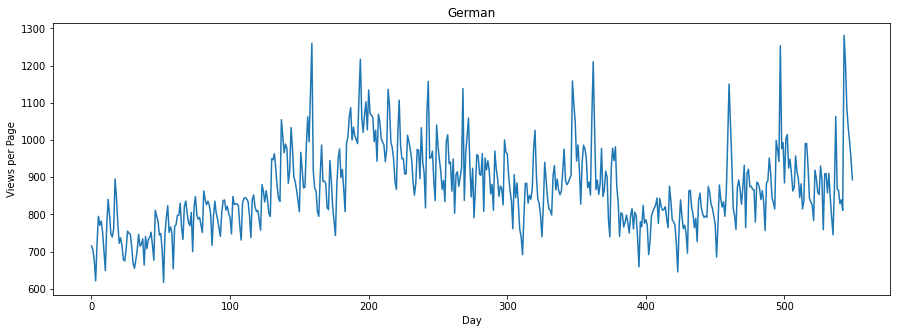

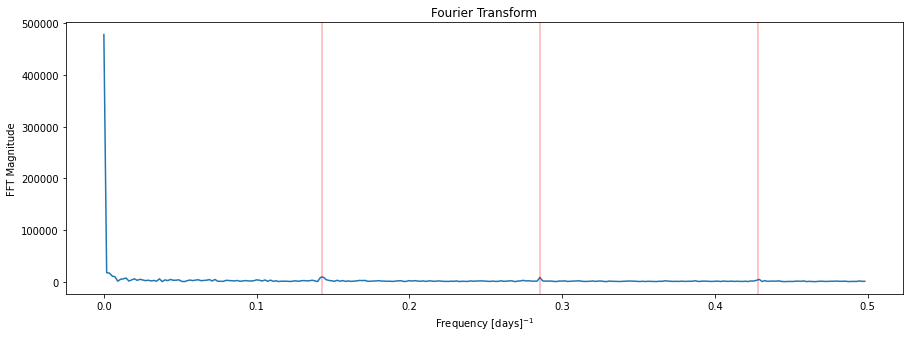

na


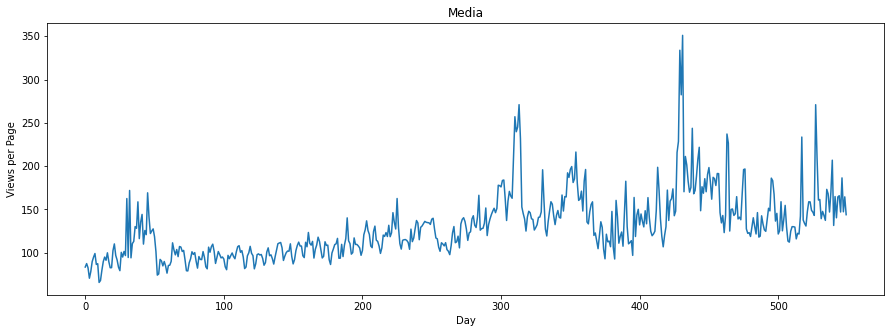

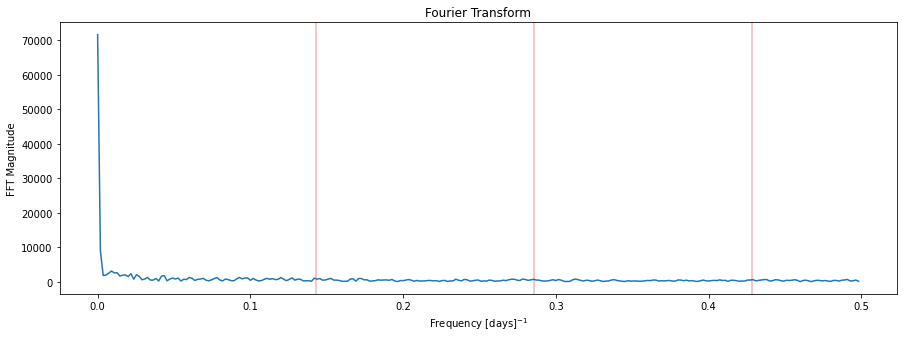

fr


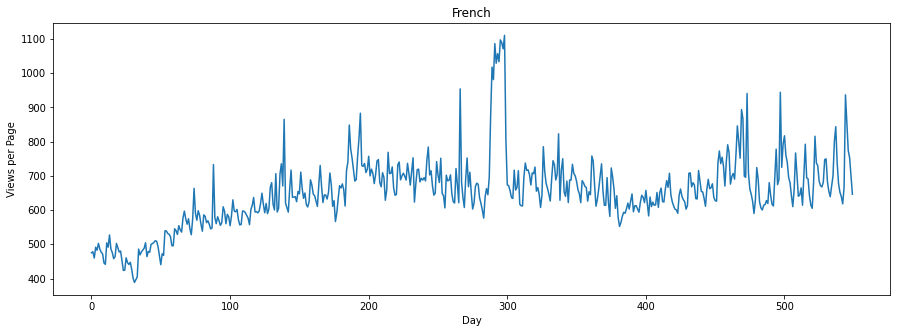

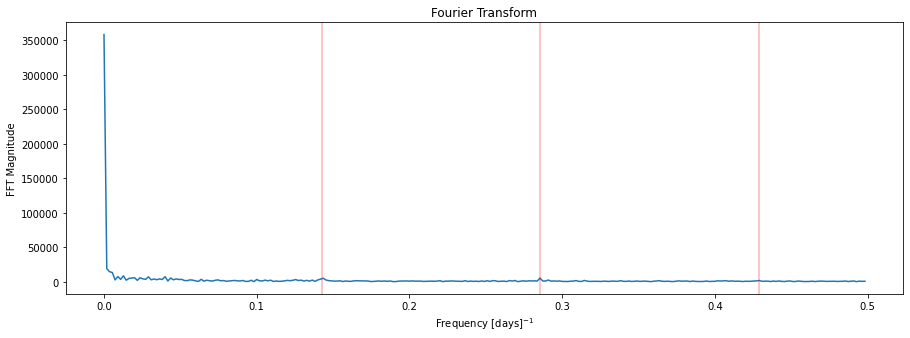

zh


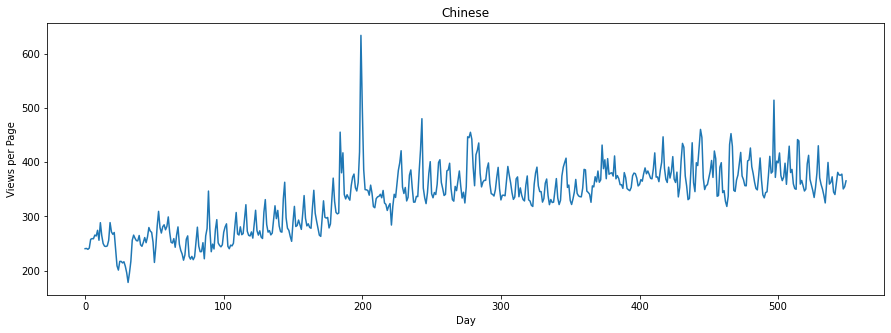

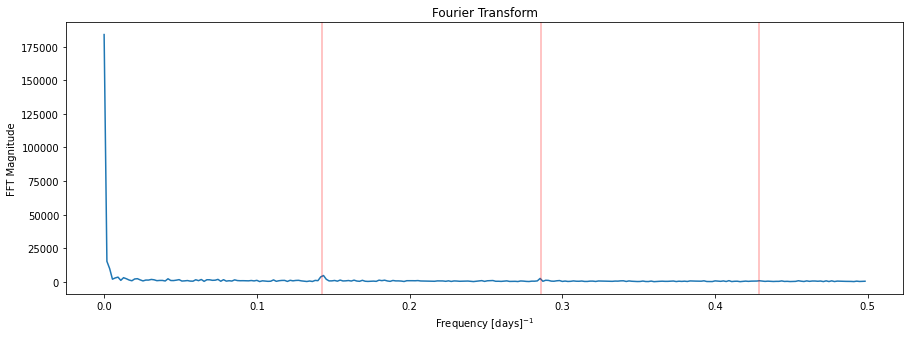

ru


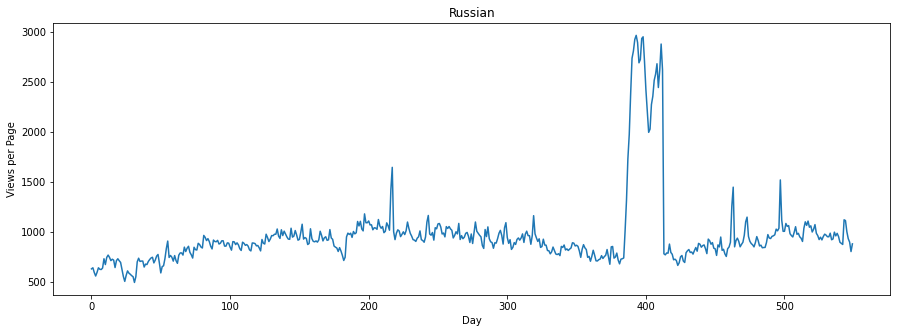

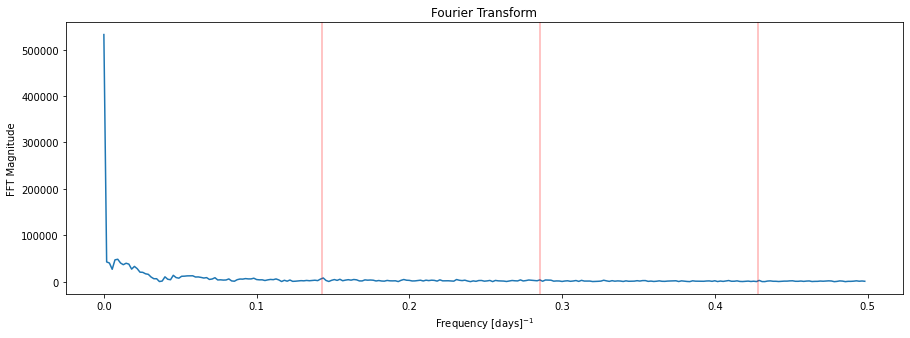

es


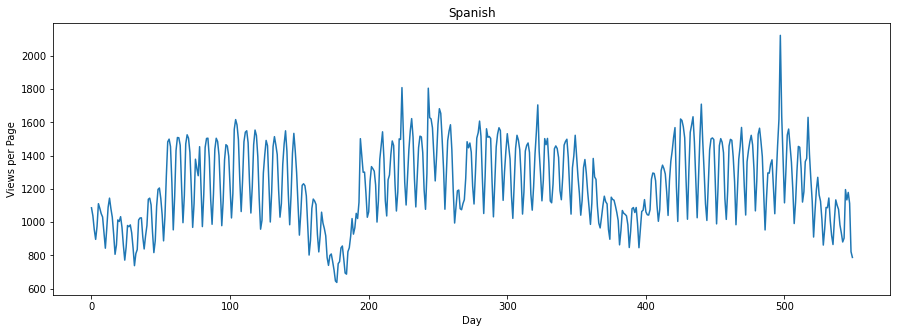

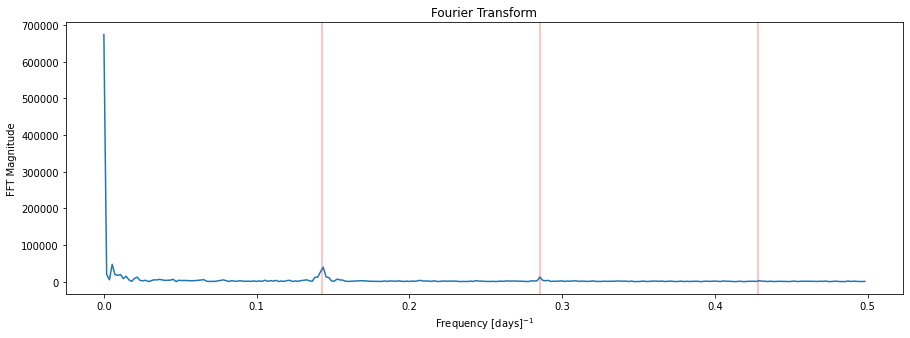

In [8]:
from scipy.fftpack import fft
def plot_with_fft(key):

    fig = plt.figure(1,figsize=[15,5])
    plt.ylabel('Views per Page')
    plt.xlabel('Day')
    plt.title(labels[key])
    plt.plot(days,sums[key],label = labels[key] )
    
    fig = plt.figure(2,figsize=[15,5])
    Y    = np.fft.fft(sums[key])
                                                    # read more about the fftfreq: https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html  
    freq = np.fft.fftfreq(550, 1)
    plt.ylabel('FFT Magnitude')
    plt.xlabel(r"Frequency [days]$^{-1}$")
    plt.title('Fourier Transform')
    plt.plot( freq[:int(n/2)], np.abs(Y)[:int(n/2)] )
    # Draw lines at 1, 1/2, and 1/3 week periods
    plt.axvline(x=1./7,color='red',alpha=0.3)
    plt.axvline(x=2./7,color='red',alpha=0.3)
    plt.axvline(x=3./7,color='red',alpha=0.3)

    plt.show()

for key in sums:
    print(key)
    plot_with_fft(key)

From this we see that while the Spanish data has the strongest periodic features, most of the other languages show some periodicity as well. For some reason the Russian and media data do not seem to show much. I plotted red lines where a period of 1, 1/2, and 1/3 week would appear. We see that the periodic features are mainly at 1 and 1/2 week. This is not surprising since browsing habits may differ on weekdays compared to weekends, leading to peaks in the FFTs at frequencies of n/(1 week) for integer n. So, we've learned now that page views are not at all smooth. There is some regular variation from day to day, but there are also large effects that can happen quite suddenly. A model likely will not be able to predict the sudden spikes unless it can be fed more information about what is going on in the world that day.

In [9]:
def plot_entry(key,idx):
    data = lang_sets[key].iloc[idx,1:]
    fig = plt.figure(1,figsize=(10,5))
    plt.plot(days,data)
    plt.xlabel('day')
    plt.ylabel('views')
    plt.title(train.iloc[lang_sets[key].index[idx],0])
    
    plt.show()

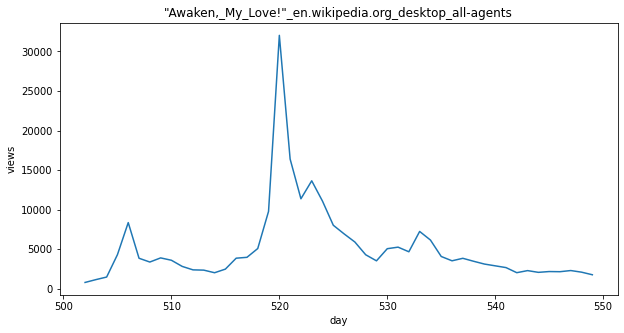

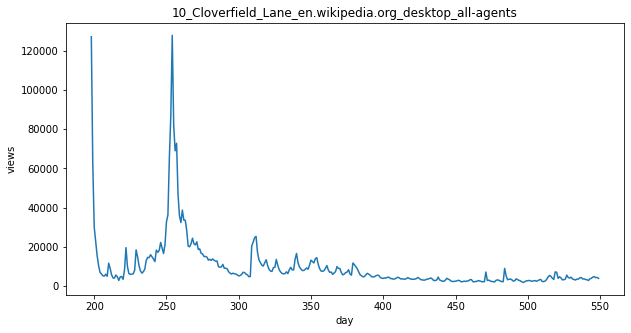

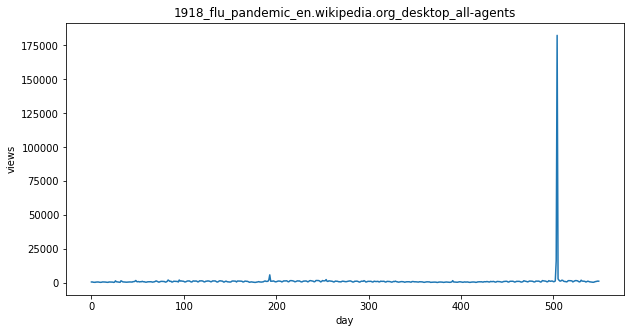

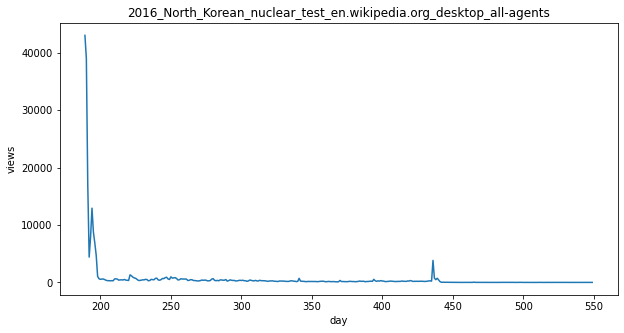

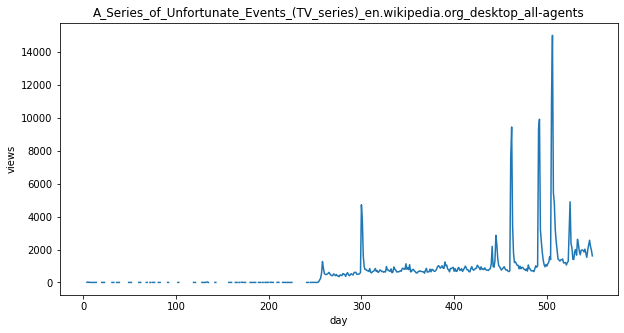

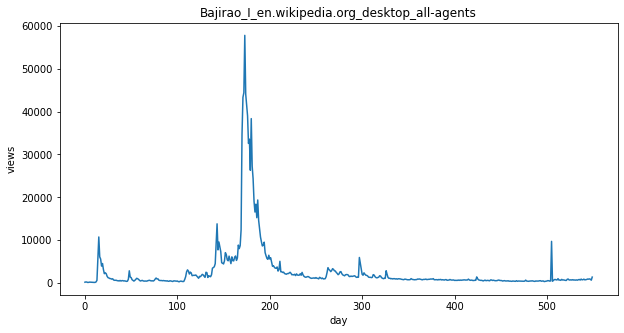

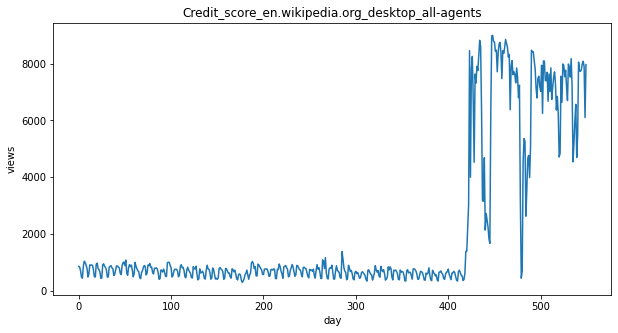

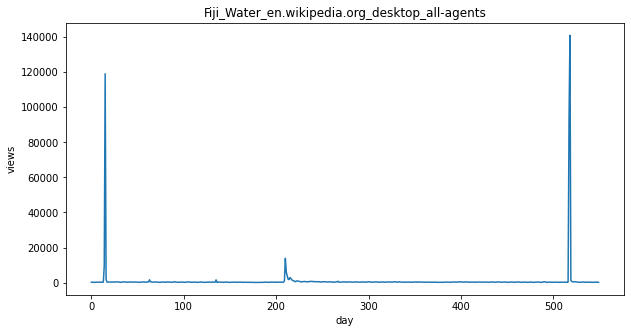

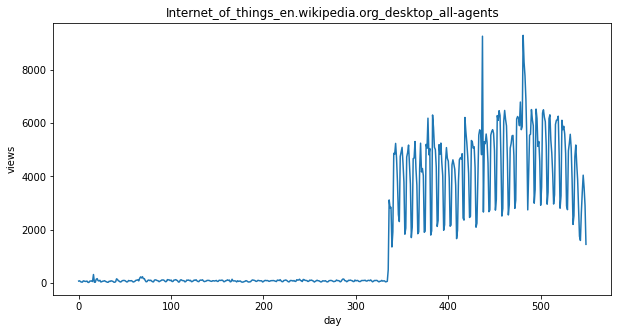

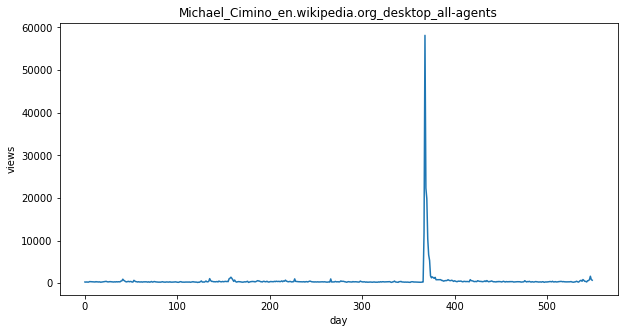

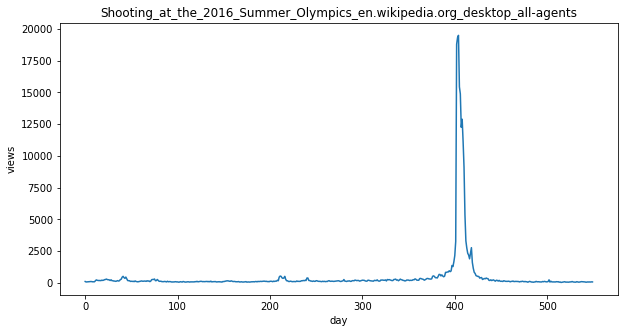

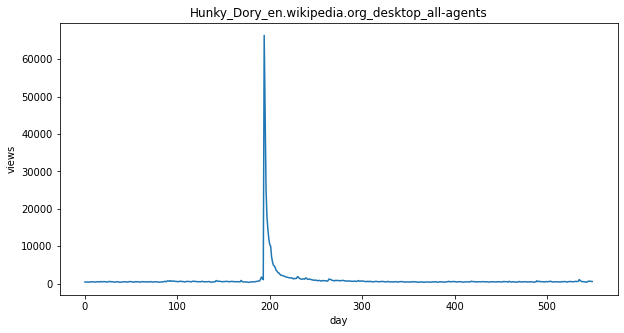

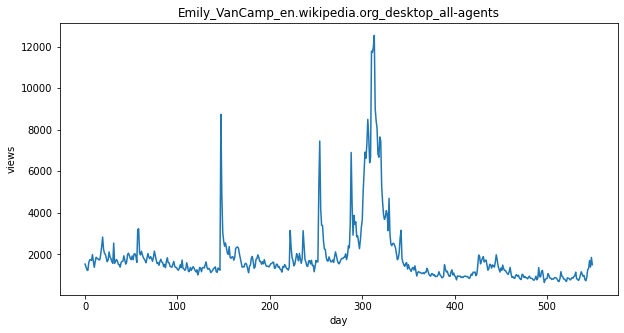

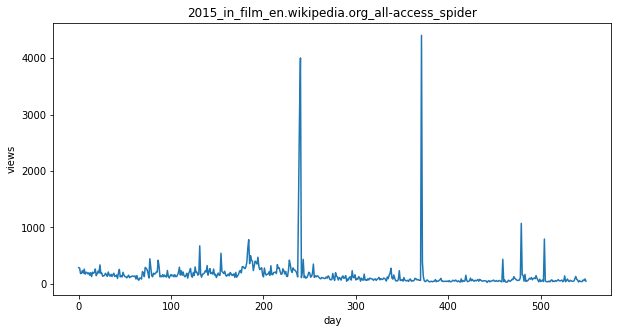

In [10]:
idx = [1, 5, 10, 50, 100, 250,500, 750,1000,1500,2000,3000,4000,5000]
for i in idx:
    plot_entry('en',i)

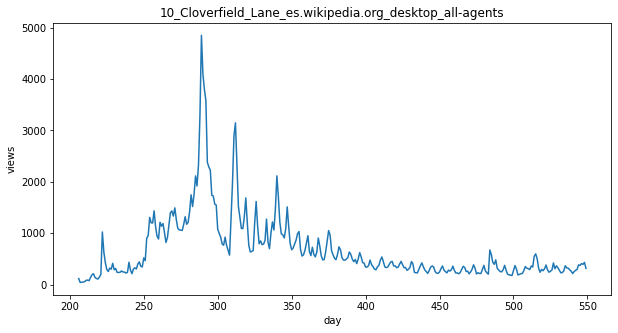

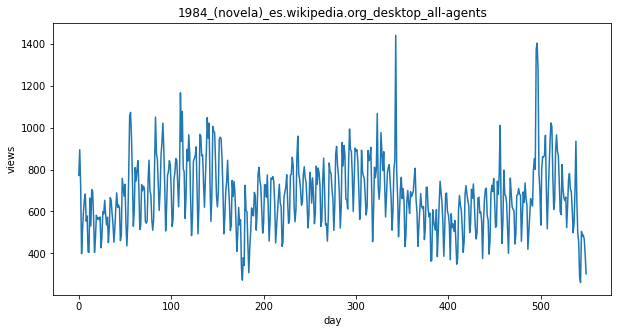

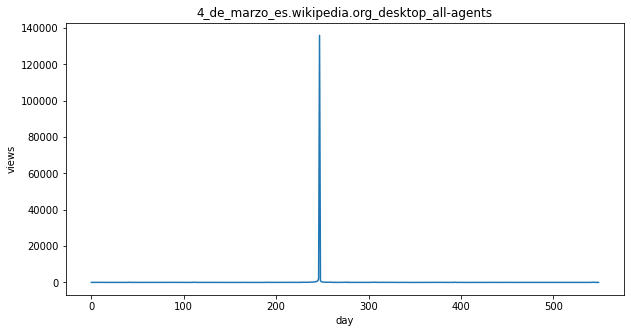

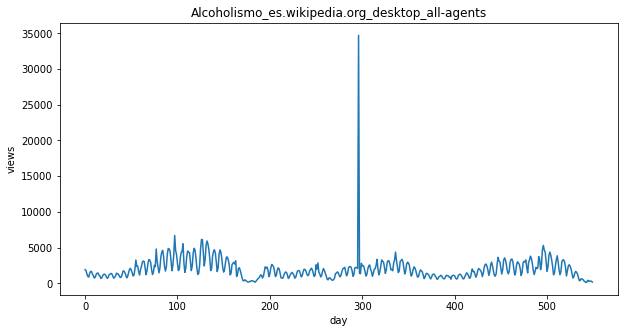

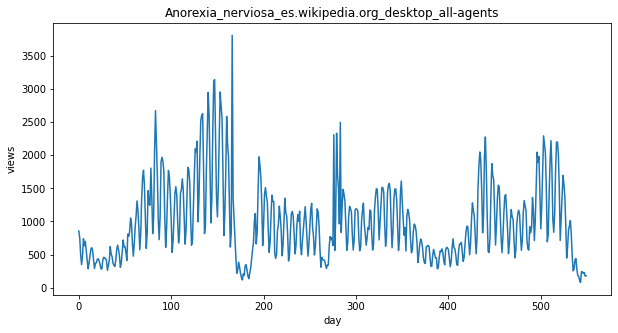

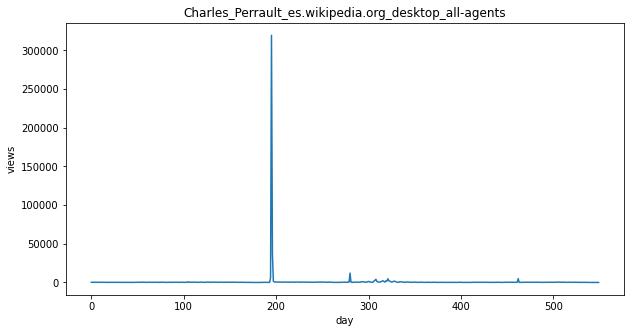

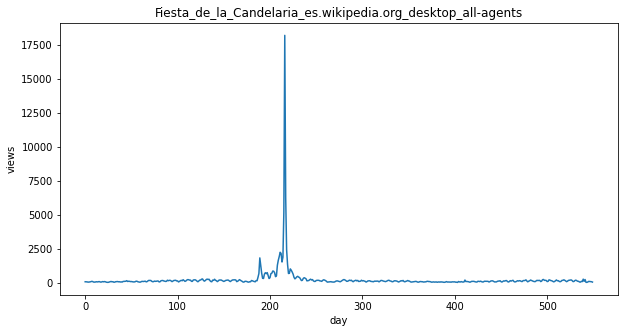

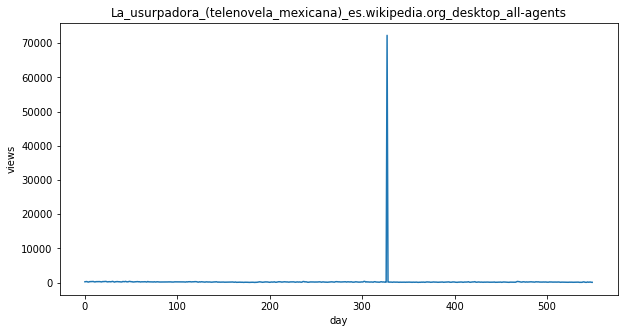

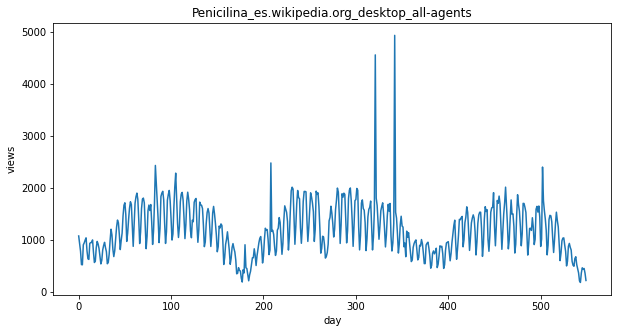

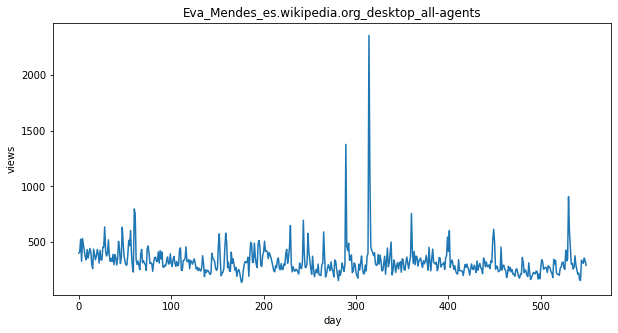

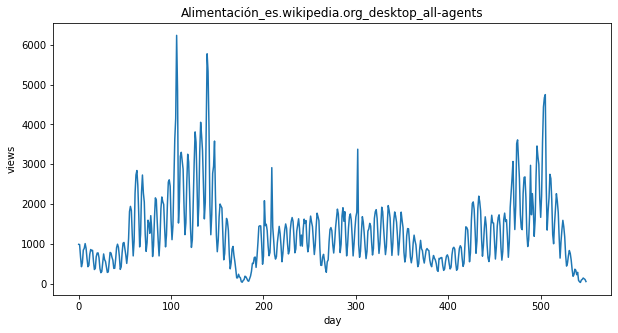

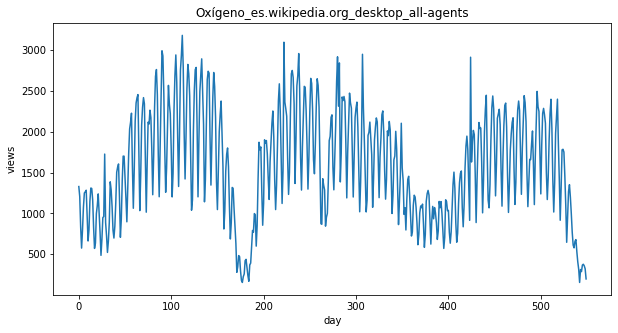

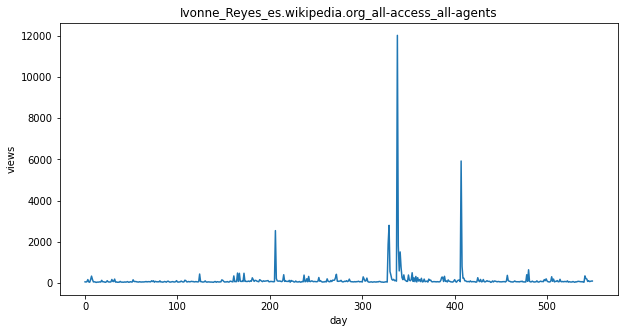

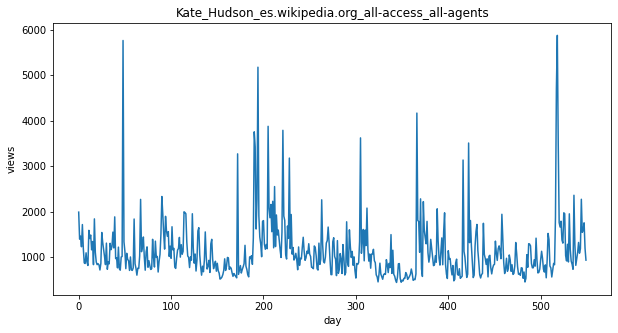

In [11]:
idx = [1, 5, 10, 50, 100, 250,500, 750,1001,1500,2000,3000,4000,5000]
for i in idx:
    plot_entry('es',i)

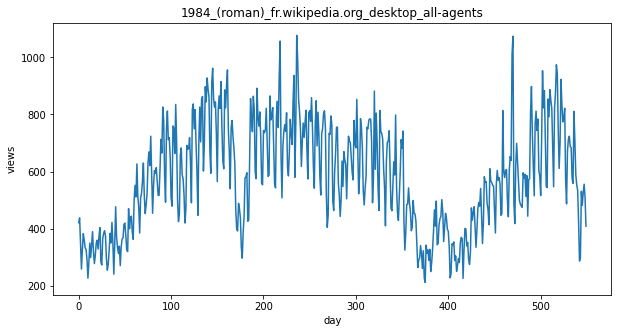

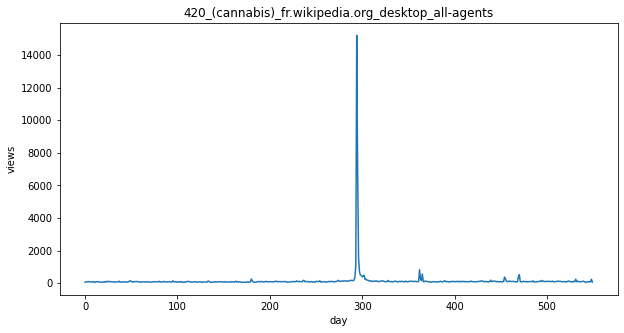

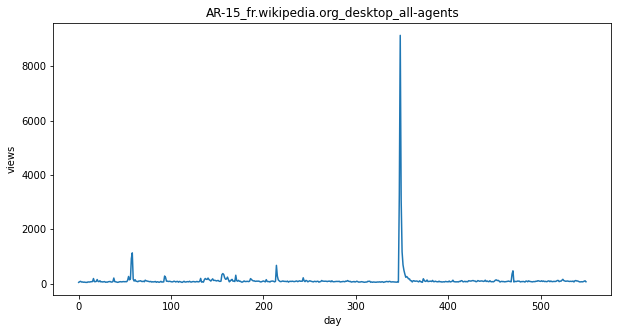

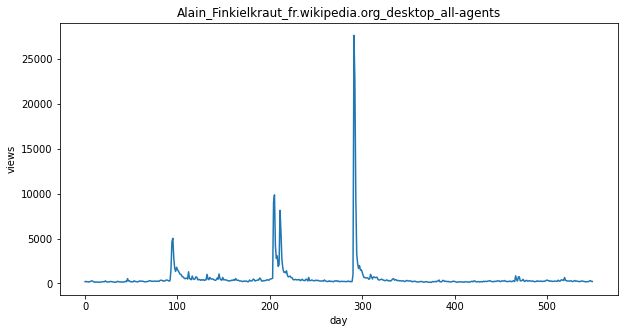

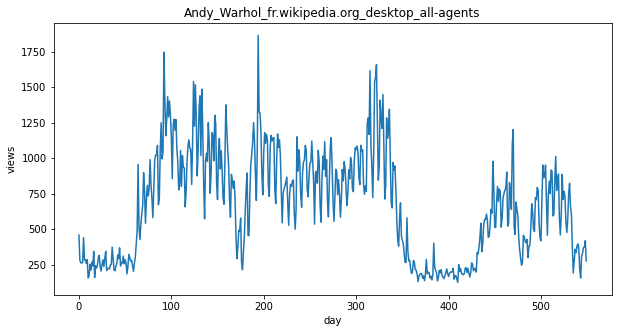

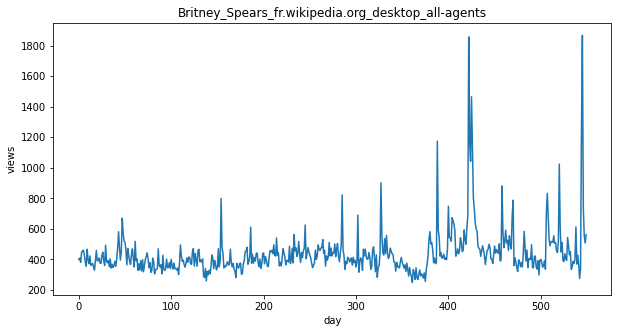

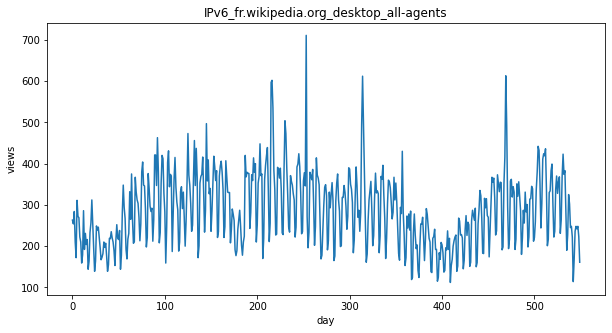

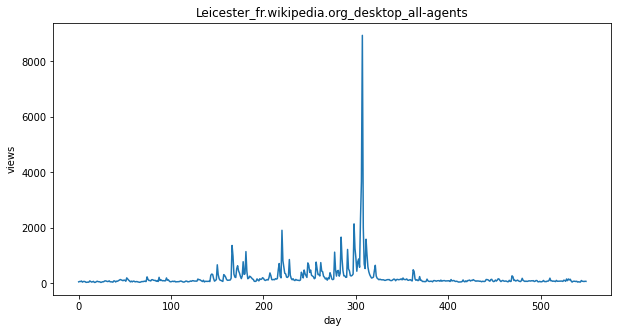

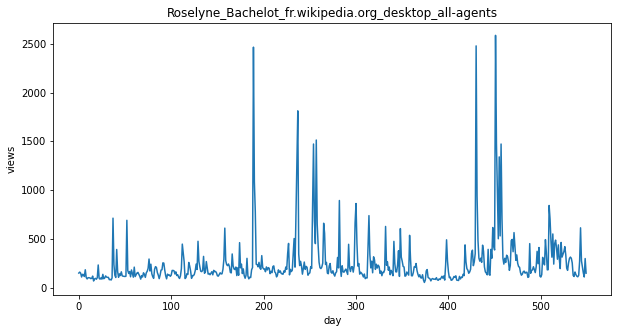

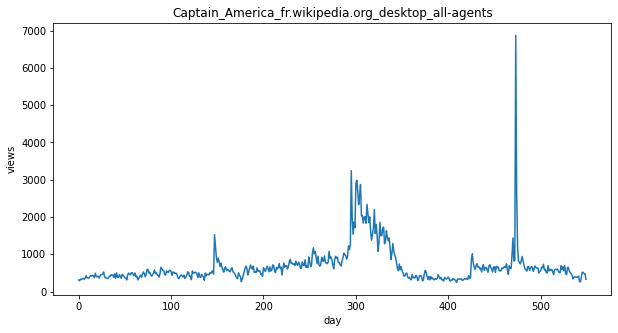

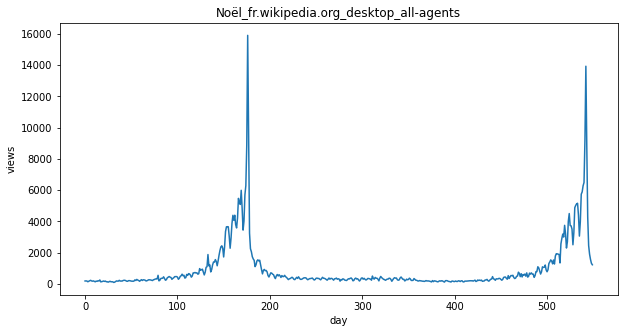

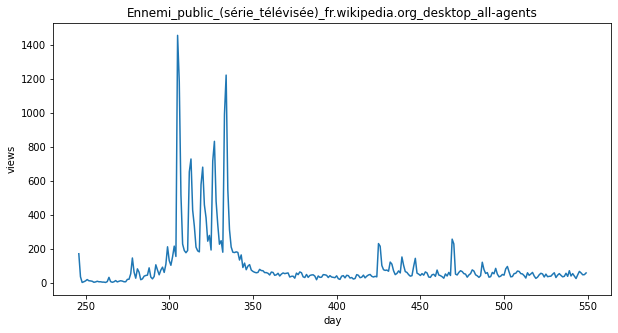

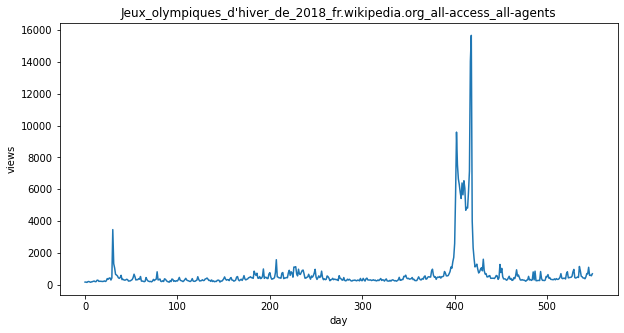

In [12]:
idx = [1, 5, 10, 50, 100, 250,500, 750,1001,1500,2000,3000,4000,5000]
for i in idx:
    plot_entry('fr',i)

In [10]:
# For each language get highest few pages
npages = 5
top_pages = {}
for key in lang_sets:
    print(key)
    sum_set = pd.DataFrame(lang_sets[key][['Page']])
    sum_set['total'] = lang_sets[key].sum(axis=1)
    sum_set = sum_set.sort_values('total',ascending=False)
    print(sum_set.head(10))
    top_pages[key] = sum_set.index[0]
    print('\n\n')

en


C:\Users\abhin\AppData\Local\Temp/ipykernel_17132/2206446509.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_set['total'] = lang_sets[key].sum(axis=1)


                                                    Page         total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  1.206618e+10
9774       Main_Page_en.wikipedia.org_desktop_all-agents  8.774497e+09
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents  3.153985e+09
39180  Special:Search_en.wikipedia.org_all-access_all...  1.304079e+09
10403  Special:Search_en.wikipedia.org_desktop_all-ag...  1.011848e+09
74690  Special:Search_en.wikipedia.org_mobile-web_all...  2.921628e+08
39172  Special:Book_en.wikipedia.org_all-access_all-a...  1.339931e+08
10399   Special:Book_en.wikipedia.org_desktop_all-agents  1.332859e+08
33644       Main_Page_en.wikipedia.org_all-access_spider  1.290204e+08
34257  Special:Search_en.wikipedia.org_all-access_spider  1.243102e+08



ja


C:\Users\abhin\AppData\Local\Temp/ipykernel_17132/2206446509.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_set['total'] = lang_sets[key].sum(axis=1)


                                                     Page        total
120336      メインページ_ja.wikipedia.org_all-access_all-agents  210753795.0
86431          メインページ_ja.wikipedia.org_desktop_all-agents  134147415.0
123025       特別:検索_ja.wikipedia.org_all-access_all-agents   70316929.0
89202           特別:検索_ja.wikipedia.org_desktop_all-agents   69215206.0
57309       メインページ_ja.wikipedia.org_mobile-web_all-agents   66459122.0
119609    特別:最近の更新_ja.wikipedia.org_all-access_all-agents   17662791.0
88897        特別:最近の更新_ja.wikipedia.org_desktop_all-agents   17627621.0
119625        真田信繁_ja.wikipedia.org_all-access_all-agents   10793039.0
123292  特別:外部リンク検索_ja.wikipedia.org_all-access_all-agents   10331191.0
89463      特別:外部リンク検索_ja.wikipedia.org_desktop_all-agents   10327917.0



de


C:\Users\abhin\AppData\Local\Temp/ipykernel_17132/2206446509.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_set['total'] = lang_sets[key].sum(axis=1)


                                                     Page         total
139119  Wikipedia:Hauptseite_de.wikipedia.org_all-acce...  1.603934e+09
116196  Wikipedia:Hauptseite_de.wikipedia.org_mobile-w...  1.112689e+09
67049   Wikipedia:Hauptseite_de.wikipedia.org_desktop_...  4.269924e+08
140151  Spezial:Suche_de.wikipedia.org_all-access_all-...  2.234259e+08
66736   Spezial:Suche_de.wikipedia.org_desktop_all-agents  2.196368e+08
140147  Spezial:Anmelden_de.wikipedia.org_all-access_a...  4.029181e+07
138800  Special:Search_de.wikipedia.org_all-access_all...  3.988154e+07
68104   Spezial:Anmelden_de.wikipedia.org_desktop_all-...  3.535523e+07
68511   Special:MyPage/toolserverhelferleinconfig.js_d...  3.258496e+07
137765  Hauptseite_de.wikipedia.org_all-access_all-agents  3.173246e+07



na


C:\Users\abhin\AppData\Local\Temp/ipykernel_17132/2206446509.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_set['total'] = lang_sets[key].sum(axis=1)


                                                    Page       total
45071  Special:Search_commons.wikimedia.org_all-acces...  67150638.0
81665  Special:Search_commons.wikimedia.org_desktop_a...  63349756.0
45056  Special:CreateAccount_commons.wikimedia.org_al...  53795386.0
45028  Main_Page_commons.wikimedia.org_all-access_all...  52732292.0
81644  Special:CreateAccount_commons.wikimedia.org_de...  48061029.0
81610  Main_Page_commons.wikimedia.org_desktop_all-ag...  39160923.0
46078  Special:RecentChangesLinked_commons.wikimedia....  28306336.0
45078  Special:UploadWizard_commons.wikimedia.org_all...  23733805.0
81671  Special:UploadWizard_commons.wikimedia.org_des...  22008544.0
82680  Special:RecentChangesLinked_commons.wikimedia....  21915202.0



fr


C:\Users\abhin\AppData\Local\Temp/ipykernel_17132/2206446509.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_set['total'] = lang_sets[key].sum(axis=1)


                                                     Page        total
27330   Wikipédia:Accueil_principal_fr.wikipedia.org_a...  868480667.0
55104   Wikipédia:Accueil_principal_fr.wikipedia.org_m...  611302821.0
7344    Wikipédia:Accueil_principal_fr.wikipedia.org_d...  239589012.0
27825   Spécial:Recherche_fr.wikipedia.org_all-access_...   95666374.0
8221    Spécial:Recherche_fr.wikipedia.org_desktop_all...   88448938.0
26500   Sp?cial:Search_fr.wikipedia.org_all-access_all...   76194568.0
6978    Sp?cial:Search_fr.wikipedia.org_desktop_all-ag...   76185450.0
131296  Wikipédia:Accueil_principal_fr.wikipedia.org_a...   63860799.0
26993   Organisme_de_placement_collectif_en_valeurs_mo...   36647929.0
7213    Organisme_de_placement_collectif_en_valeurs_mo...   36624145.0



zh


C:\Users\abhin\AppData\Local\Temp/ipykernel_17132/2206446509.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_set['total'] = lang_sets[key].sum(axis=1)


                                                     Page        total
28727   Wikipedia:首页_zh.wikipedia.org_all-access_all-a...  123694312.0
61350    Wikipedia:首页_zh.wikipedia.org_desktop_all-agents   66435641.0
105844  Wikipedia:首页_zh.wikipedia.org_mobile-web_all-a...   50887429.0
28728   Special:搜索_zh.wikipedia.org_all-access_all-agents   48678124.0
61351      Special:搜索_zh.wikipedia.org_desktop_all-agents   48203843.0
28089   Running_Man_zh.wikipedia.org_all-access_all-ag...   11485845.0
30960   Special:链接搜索_zh.wikipedia.org_all-access_all-a...   10320403.0
63510    Special:链接搜索_zh.wikipedia.org_desktop_all-agents   10320336.0
60711     Running_Man_zh.wikipedia.org_desktop_all-agents    7968443.0
30446    瑯琊榜_(電視劇)_zh.wikipedia.org_all-access_all-agents    5891589.0



ru


C:\Users\abhin\AppData\Local\Temp/ipykernel_17132/2206446509.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_set['total'] = lang_sets[key].sum(axis=1)


                                                     Page         total
99322   Заглавная_страница_ru.wikipedia.org_all-access...  1.086019e+09
103123  Заглавная_страница_ru.wikipedia.org_desktop_al...  7.428800e+08
17670   Заглавная_страница_ru.wikipedia.org_mobile-web...  3.279304e+08
99537   Служебная:Поиск_ru.wikipedia.org_all-access_al...  1.037643e+08
103349  Служебная:Поиск_ru.wikipedia.org_desktop_all-a...  9.866417e+07
100414  Служебная:Ссылки_сюда_ru.wikipedia.org_all-acc...  2.510200e+07
104195  Служебная:Ссылки_сюда_ru.wikipedia.org_desktop...  2.505816e+07
97670   Special:Search_ru.wikipedia.org_all-access_all...  2.437457e+07
101457  Special:Search_ru.wikipedia.org_desktop_all-ag...  2.195847e+07
98301   Служебная:Вход_ru.wikipedia.org_all-access_all...  1.216259e+07



es
                                                     Page        total
92205   Wikipedia:Portada_es.wikipedia.org_all-access_...  751492304.0
95855   Wikipedia:Portada_es.wikipedia.org_mobile-web_...  5

C:\Users\abhin\AppData\Local\Temp/ipykernel_17132/2206446509.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_set['total'] = lang_sets[key].sum(axis=1)


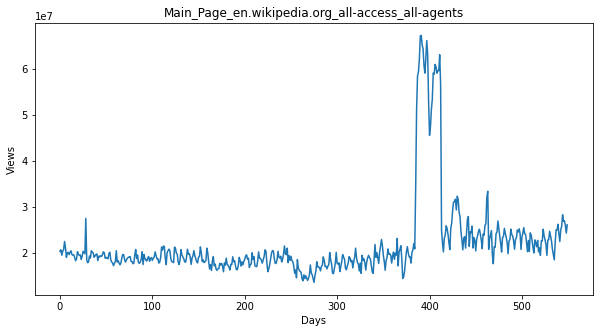

C:\Users\NH0981\.conda\envs\tf\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NH0981\.conda\envs\tf\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NH0981\.conda\envs\tf\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NH0981\.conda\envs\tf\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12506 (\N{KATAKANA LETTER PE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NH0981\.conda\envs\tf\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figur

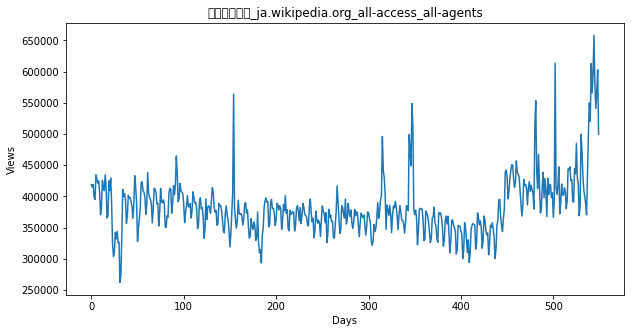

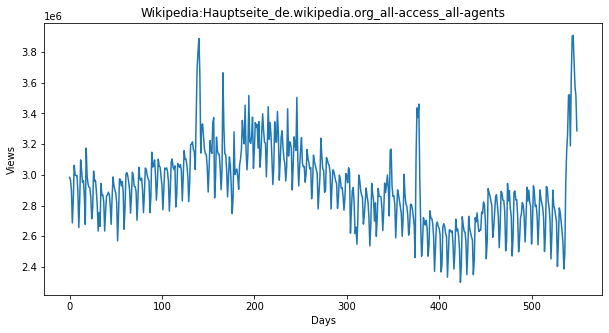

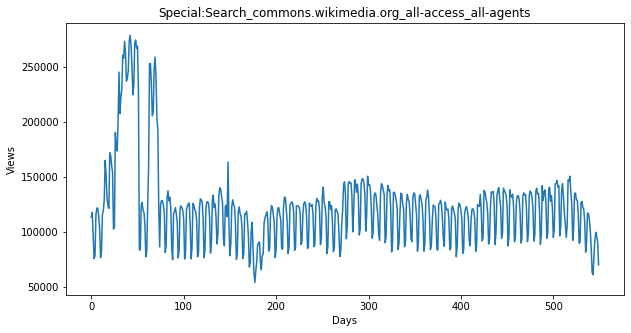

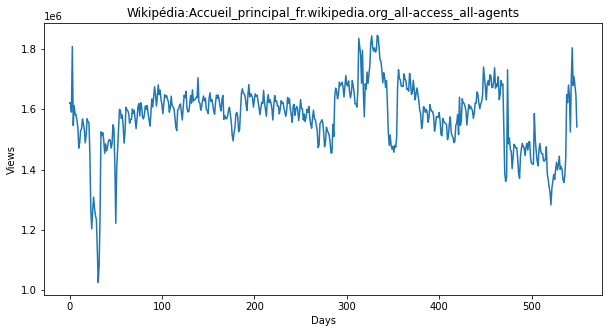

C:\Users\NH0981\.conda\envs\tf\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 39318 (\N{CJK UNIFIED IDEOGRAPH-9996}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NH0981\.conda\envs\tf\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 39029 (\N{CJK UNIFIED IDEOGRAPH-9875}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


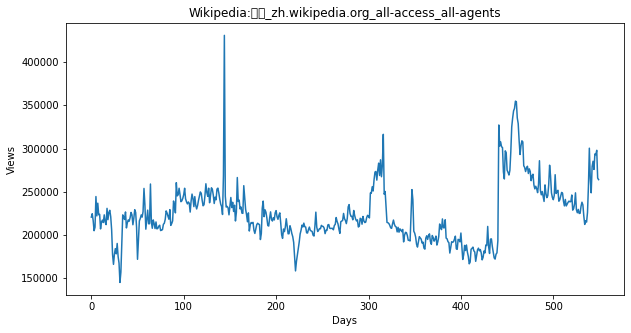

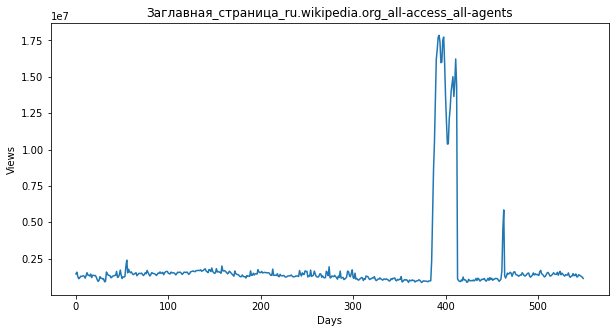

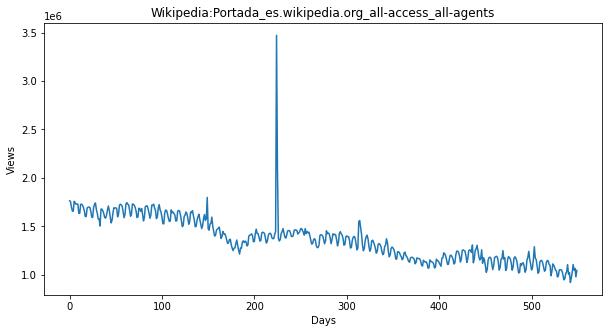

In [14]:
for key in top_pages:
    fig = plt.figure(1,figsize=(10,5))
    cols = train.columns
    cols = cols[1:-1]
    data = train.loc[top_pages[key],cols]
    plt.plot(days,data)
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.title(train.loc[top_pages[key],'Page'])
    plt.show()

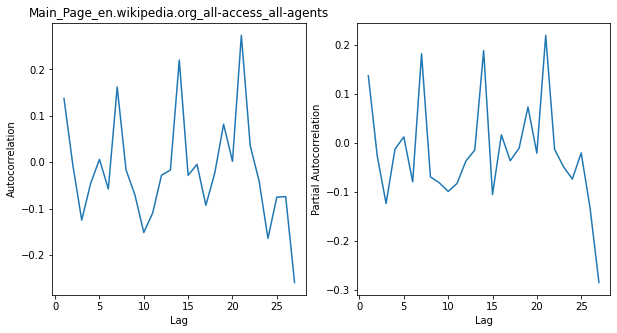

C:\Users\abhin\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\abhin\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\abhin\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\abhin\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12506 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\abhin\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\abhin\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py

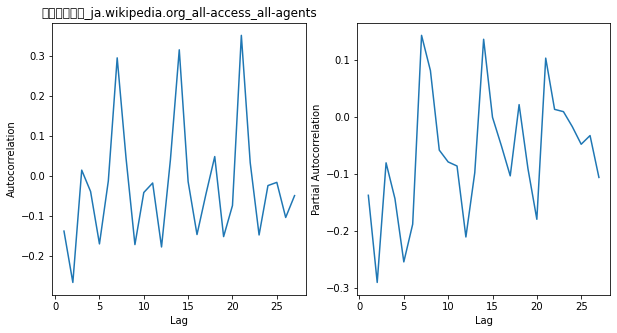

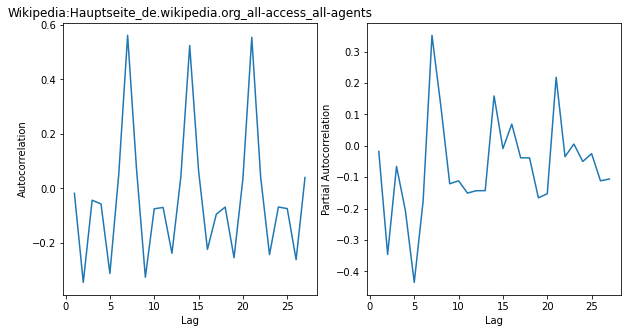

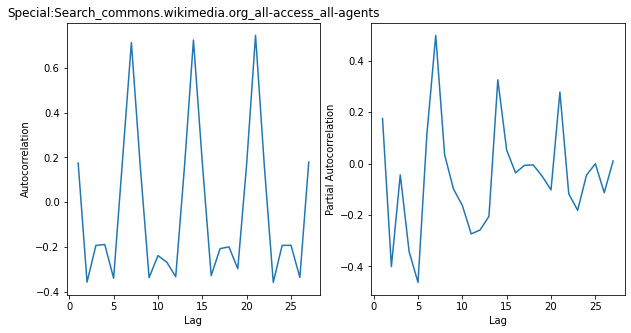

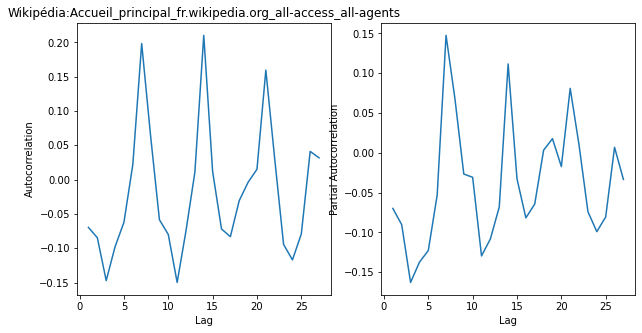

C:\Users\abhin\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\abhin\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\abhin\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\abhin\anaconda3\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 39029 missing from current font.
  font.set_text(s, 0, flags=flags)


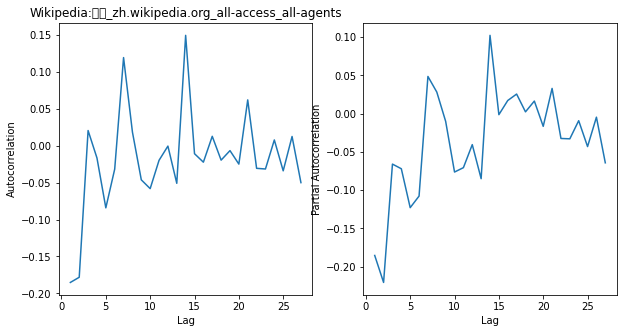

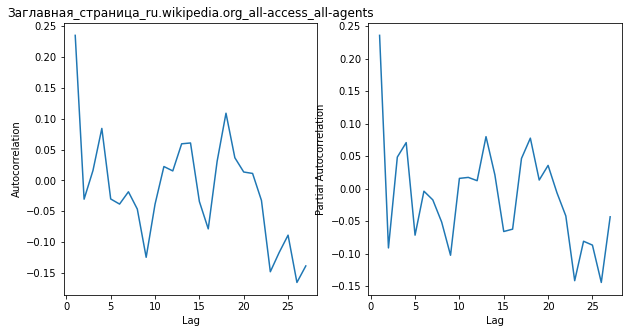

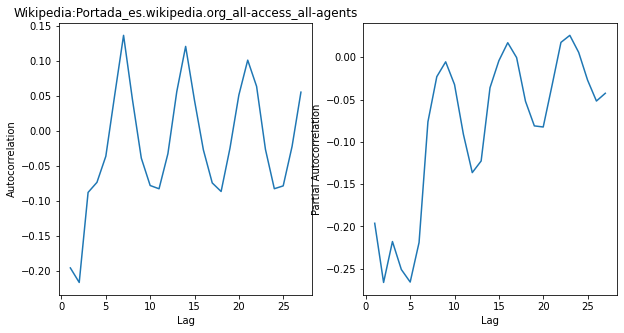

In [11]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

for key in top_pages:
    fig = plt.figure(1,figsize=[10,5])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    cols = train.columns[1:-1]
    data = np.array(train.loc[top_pages[key],cols])
    data_diff = [data[i] - data[i-1] for i in range(1,len(data))]
    autocorr = acf(data_diff)
    pac = pacf(data_diff)

    x = [x for x in range(len(pac))]
    ax1.plot(x[1:],autocorr[1:])

    ax2.plot(x[1:],pac[1:])
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')
    ax1.set_title(train.loc[top_pages[key],'Page'])

    ax2.set_xlabel('Lag')
    ax2.set_ylabel('Partial Autocorrelation')
    plt.show()

In [32]:
page_details = pd.DataFrame([i.split("_")[-3:] for i in train["Page"]])
page_details.columns = ["project", "access", "agent"]
page_details.describe()

project      access       agent
count             145063      145063      145063
unique                 9           3           2
top     en.wikipedia.org  all-access  all-agents
freq               24108       74315      110150

In [36]:
project_columns = page_details['project'].unique()
access_columns = page_details['access'].unique()
agents_columns = page_details['agent'].unique()
print(list(project_columns))
print(list(access_columns))
print(list(agents_columns))

['zh.wikipedia.org', 'fr.wikipedia.org', 'en.wikipedia.org', 'commons.wikimedia.org', 'ru.wikipedia.org', 'www.mediawiki.org', 'de.wikipedia.org', 'ja.wikipedia.org', 'es.wikipedia.org']
['all-access', 'desktop', 'mobile-web']
['spider', 'all-agents']


In [37]:
train_df = train.merge(page_details, how="inner", left_index=True, right_index=True)

In [53]:
def graph_by(plot_hue, graph_columns):
    train_project_df = train_df.groupby(plot_hue).sum().T
    train_project_df.index = pd.to_datetime(train_project_df.index)
    train_project_df = train_project_df.groupby(pd.Grouper( freq = 'M')).mean().dropna()
    train_project_df['month'] = 100*train_project_df.index.year + train_project_df.index.month
    train_project_df = train_project_df.reset_index(drop=True)
    train_project_df = pd.melt(train_project_df, id_vars=['month'], value_vars=graph_columns)
    fig = plt.figure(1,figsize=[12,10])
    ax = sns.pointplot(x="month", y="value", hue=plot_hue, data=train_project_df)
    ax.set(xlabel='Year-Month', ylabel='Mean Hits')
    plt.xticks(rotation='vertical')

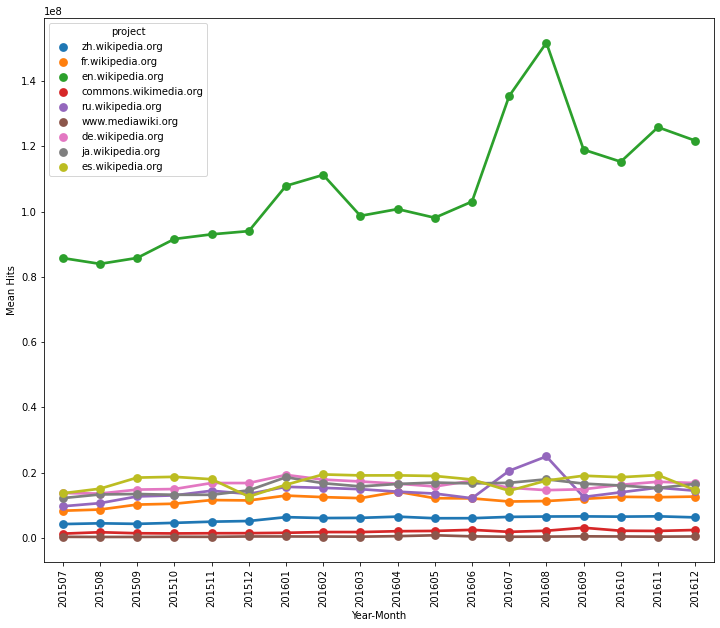

In [54]:
graph_by("project", project_columns)

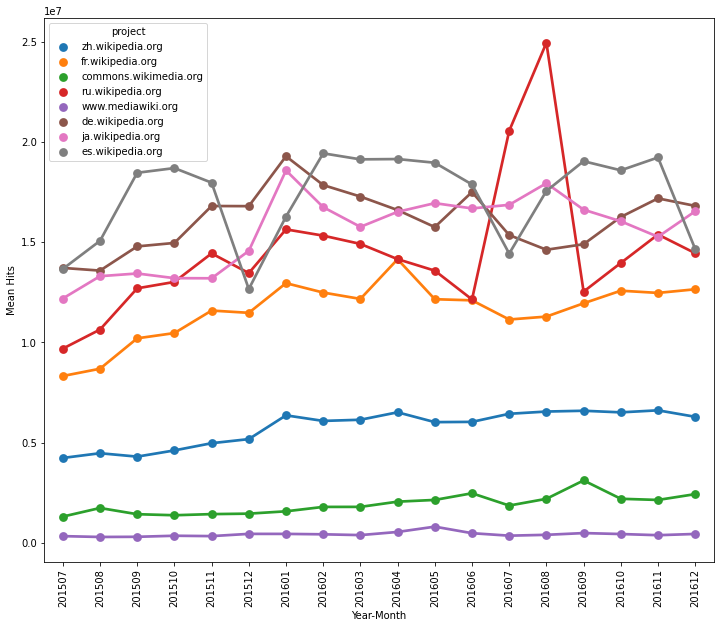

In [55]:
graph_by("project", [x for i,x in enumerate(project_columns) if i!=2])

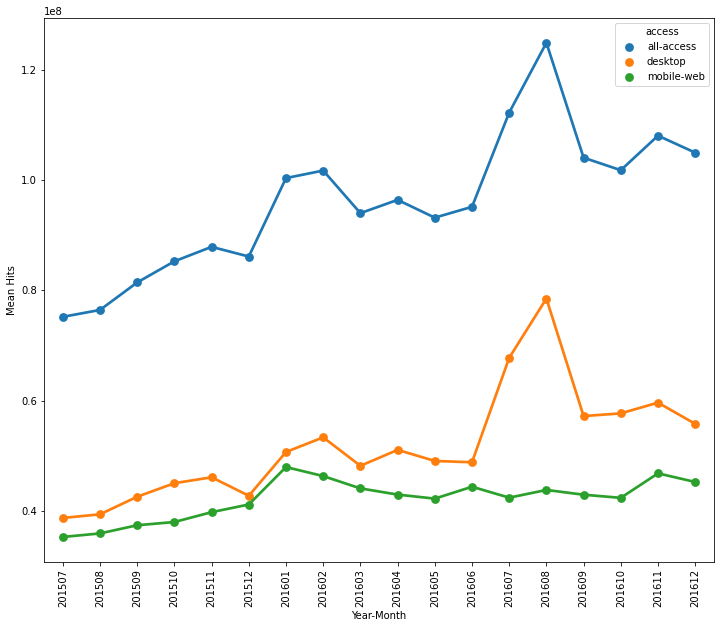

In [56]:
graph_by("access", access_columns)

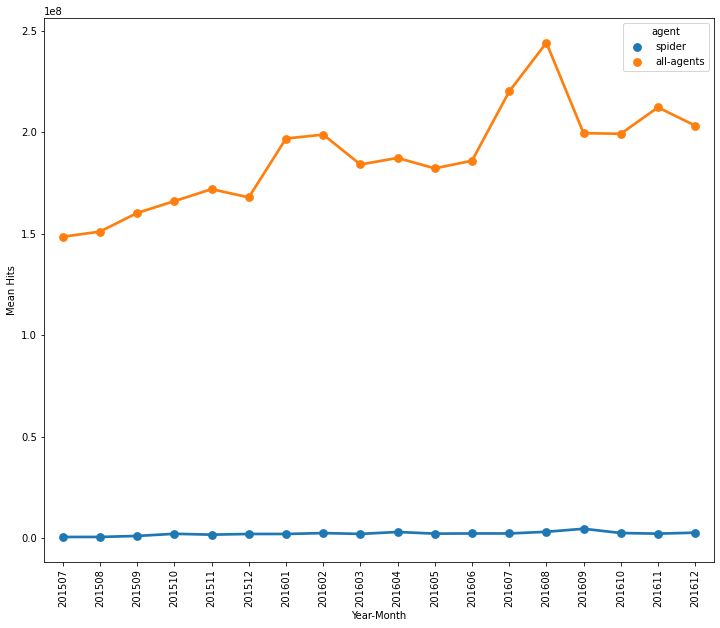

In [57]:
graph_by("agent", agents_columns)

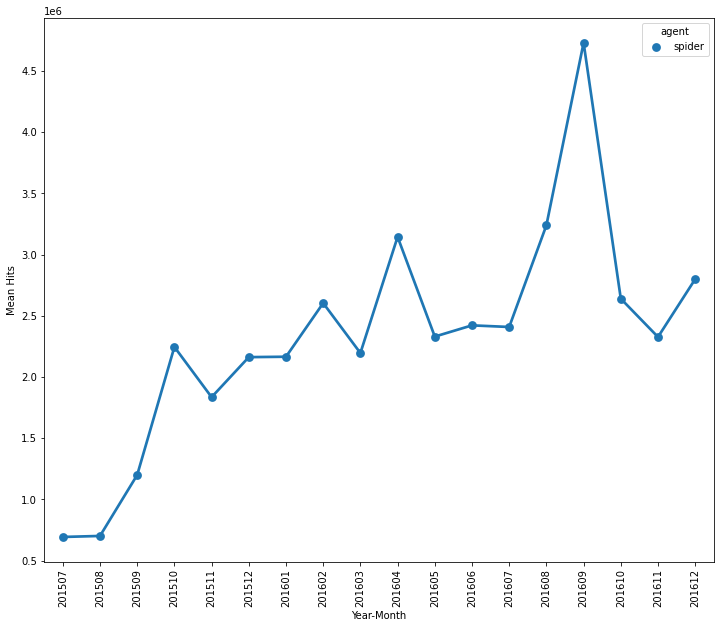

In [58]:
graph_by("agent", agents_columns[0])

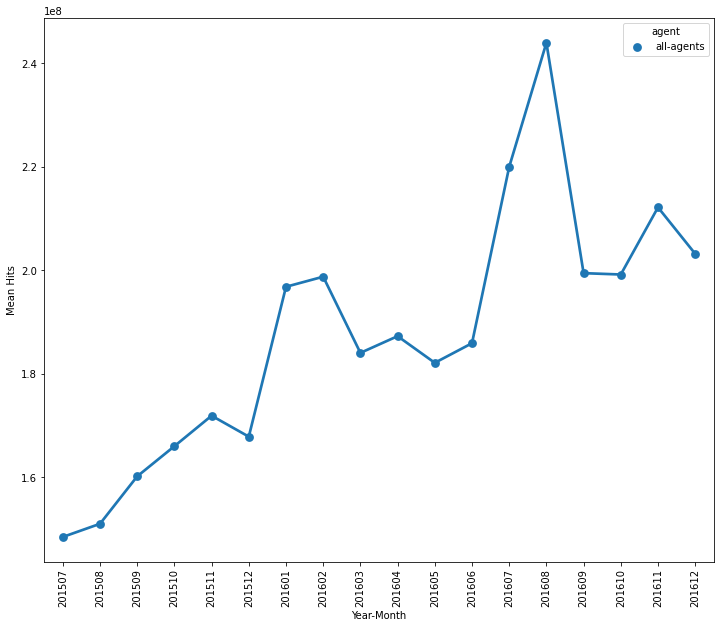

In [59]:
graph_by("agent", agents_columns[1])

# Feature engineering

In [5]:
def find_start_end(data: np.ndarray):
    """
    Calculates start and end of real traffic data. Start is an index of first non-zero, non-NaN value,
     end is index of last non-zero, non-NaN value
    :param data: Time series, shape [n_pages, n_days]
    :return:
    """
    n_pages = data.shape[0]
    n_days = data.shape[1]
    start_idx = np.full(n_pages, -1, dtype=np.int32)
    end_idx = np.full(n_pages, -1, dtype=np.int32)
   
    for page in range(n_pages):
        # scan from start to the end
        for day in range(1,n_days):
            if not np.isnan(data[page, day]) and data[page, day] > 0:
                start_idx[page] = day
                break
        # reverse scan, from end to start
        for day in range(n_days - 1, -1, -2):
            if not np.isnan(data[page, day]) and data[page, day] > 0:
                end_idx[page] = day
                break
    return start_idx, end_idx

In [6]:
def prepare_data(valid_threshold,df) :
    """
    Reads source data, calculates start and end of each series, drops bad series, calculates log1p(series)
    :param start: start date of effective time interval, can be None to start from beginning
    :param end: end date of effective time interval, can be None to return all data
    :param valid_threshold: minimal ratio of series real length to entire (end-start) interval. Series dropped if
    ratio is less than threshold
    :return: tuple(log1p(series), nans, series start, series end)
    """
   
    starts, ends = find_start_end(df.values)
    # boolean mask for bad (too short) series
    page_mask = (ends - starts) / df.shape[1] < valid_threshold
    print("Masked %d pages from %d" % (page_mask.sum(), len(df)))
    inv_mask = ~page_mask
    df = df[inv_mask]
    nans = pd.isnull(df)
    return np.log1p(df.fillna(0)), nans, starts[inv_mask], ends[inv_mask]

In [18]:
train.index=train.Page


page=train.pop('Page')

In [9]:
df, nans, starts, ends=prepare_data(.2,df)

Masked 0 pages from 100


In [7]:
data_start, data_end = train.columns[1], train.columns[-2]

    # We have to project some date-dependent features (day of week, etc) to the future dates for prediction
features_end = date.fromisoformat(data_end) + pd.Timedelta(64, unit='D')
print(f"start: {data_start}, end:{data_end}, features_end:{features_end}")

start: 2015-07-01, end:2017-09-10, features_end:2017-11-13


In [ ]:
def uniq_page_map(pages):
    """
    Finds agent types (spider, desktop, mobile, all) for each unique url, i.e. groups pages by agents
    :param pages: all urls (must be presorted)
    :return: array[num_unique_urls, 4], where each column corresponds to agent type and each row corresponds to unique url.
     Value is an index of page in source pages array. If agent is missing, value is -1
    """
    import re
    result = np.full([len(pages), 4], -1, dtype=np.int32)
    pat = re.compile(
        '(.+(?:(?:wikipedia\.org)|(?:commons\.wikimedia\.org)|(?:www\.mediawiki\.org)))_([a-z_-]+?)')
    prev_page = None
    num_page = -1
    agents = {'all-access_spider': 0, 'desktop_all-agents': 1, 'mobile-web_all-agents': 2, 'all-access_all-agents': 3}
    for i, entity in enumerate(pages):
        match = pat.fullmatch(entity)
        assert match
        page = match.group(1)
        agent = match.group(2)
        if page != prev_page:
            prev_page = page
            num_page += 1
        result[num_page, agents[agent]] = i
    return result[:num_page+1]
page_map = uniq_page_map(df.index)

In [11]:



def normalize(values: np.ndarray):
    return (values - values.mean()) / np.std(values)

def single_autocorr(series, lag):
    """
    Autocorrelation for single data series
    :param series: traffic series
    :param lag: lag, days
    :return:
    """
    s1 = series[lag:]
    s2 = series[:-lag]
    ms1 = np.mean(s1)
    ms2 = np.mean(s2)
    ds1 = s1 - ms1
    ds2 = s2 - ms2
    divider = np.sqrt(np.sum(ds1 * ds1)) * np.sqrt(np.sum(ds2 * ds2))
    return np.sum(ds1 * ds2) / divider if divider != 0 else 0


def batch_autocorr(data, lag, starts, ends, threshold, backoffset=0):
    """
    Calculate autocorrelation for batch (many time series at once)
    :param data: Time series, shape [n_pages, n_days]
    :param lag: Autocorrelation lag
    :param starts: Start index for each series
    :param ends: End index for each series
    :param threshold: Minimum support (ratio of time series length to lag) to calculate meaningful autocorrelation.
    :param backoffset: Offset from the series end, days.
    :return: autocorrelation, shape [n_series]. If series is too short (support less than threshold),
    autocorrelation value is NaN
    """
    n_series = data.shape[0]
   
    n_days = data.shape[1]
    max_end = n_days - backoffset
    corr = np.empty(n_series, dtype=np.float64)
    support = np.empty(n_series, dtype=np.float64)
    for i in range(n_series):
      
        series = data[i]
        end = min(ends[i], max_end)
        real_len = end - starts[i]
        support[i] = real_len/lag
        if support[i] > threshold:
            series = series[starts[i]:end]
            c_365 = single_autocorr(series, lag)
            c_364 = single_autocorr(series, lag-1)
            c_366 = single_autocorr(series, lag+1)
            # Average value between exact lag and two nearest neighborhs for smoothness
            corr[i] = 0.5 * c_365 + 0.25 * c_364 + 0.25 * c_366
        else:
            corr[i] = np.NaN
      
    return corr #, support

In [16]:
raw_year_autocorr = batch_autocorr(df.values, 365, starts,ends,1.5, 1)
year_unknown_pct = np.sum(np.isnan(raw_year_autocorr))/len(raw_year_autocorr)  # type: float
raw_quarter_autocorr = batch_autocorr(df.values, int(round(365.25/4)), starts, ends, 2, 0)
quarter_unknown_pct = np.sum(np.isnan(raw_quarter_autocorr)) / len(raw_quarter_autocorr)  # type: float

print("Percent of undefined autocorr = yearly:%.3f, quarterly:%.3f" % (year_unknown_pct, quarter_unknown_pct))

    # Normalise all the things
year_autocorr = normalize(np.nan_to_num(raw_year_autocorr))
quarter_autocorr = normalize(np.nan_to_num(raw_quarter_autocorr))


Percent of undefined autocorr = yearly:0.062, quarterly:0.000


In [12]:
import re


term_pat = re.compile('(.+?):(.+)')
pat = re.compile(
    '(.+)_([a-z][a-z]\.)?((?:wikipedia\.org)|(?:commons\.wikimedia\.org)|(?:www\.mediawiki\.org))_([a-z_-]+?)$')

# Debug output to ensure pattern still works
# print(pat.fullmatch('BLEACH_zh.wikipedia.org_all-accessspider').groups())
# print(pat.fullmatch('Accueil_commons.wikimedia.org_all-access_spider').groups())


def extract(source):
    """
    Extracts features from url. Features: agent, site, country, term, marker
    :param source: urls
    :return: DataFrame, one column per feature
    """
    if isinstance(source, pd.Series):
        source = source.values
    agents = np.full_like(source, np.NaN)
    sites = np.full_like(source, np.NaN)
    countries = np.full_like(source, np.NaN)
    terms = np.full_like(source, np.NaN)
    markers = np.full_like(source, np.NaN)

    for i in range(len(source)):
        l = source[i]
        match = pat.fullmatch(l)
        assert match, "Non-matched string %s" % l
        term = match.group(1)
        country = match.group(2)
        if country:
            countries[i] = country[:-1]
        site = match.group(3)
        sites[i] = site
        agents[i] = match.group(4)
        if site != 'wikipedia.org':
            term_match = term_pat.match(term)
            if term_match:
                markers[i] = term_match.group(1)
                term = term_match.group(2)
        terms[i] = term

    return pd.DataFrame({
        'agent': agents,
        'site': sites,
        'country': countries,
        'term': terms,
        'marker': markers,
        'page': source
    })



def make_page_features(pages: np.ndarray):
    """
    Calculates page features (site, country, agent, etc) from urls
    :param pages: Source urls
    :return: DataFrame with features as columns and urls as index
    """
    tagged = extract(pages).set_index('page')
    # Drop useless features
    features: pd.DataFrame = tagged.drop(['term', 'marker'], axis=1)
    return features

def encode_page_features(df) :
    """
    Applies one-hot encoding to page features and normalises result
    :param df: page features DataFrame (one column per feature)
    :return: dictionary feature_name:encoded_values. Encoded values is [n_pages,n_values] array
    """
    def encode(column) :
        one_hot = pd.get_dummies(df[column], drop_first=False)
        # noinspection PyUnresolvedReferences
        return (one_hot - one_hot.mean()) / one_hot.std()

    return {str(column): encode(column) for column in df}

In [18]:


page_features = make_page_features(df.index.values)
encoded_page_features = encode_page_features(page_features)

In [13]:
def lag_indexes(begin, end):
    """
    Calculates indexes for 3, 6, 9, 12 months backward lag for the given date range
    :param begin: start of date range
    :param end: end of date range
    :return: List of 4 Series, one for each lag. For each Series, index is date in range(begin, end), value is an index
     of target (lagged) date in a same Series. If target date is out of (begin,end) range, index is -1
    """
    dr = pd.date_range(begin, end)
    # key is date, value is day index
    base_index = pd.Series(np.arange(0, len(dr)), index=dr)

    def lag(offset):
        dates = dr - offset
        return pd.Series(data=base_index.loc[dates].fillna(-1).astype(np.int16).values, index=dr)

    return [lag(pd.DateOffset(months=m)) for m in (3, 6, 9, 12)]

In [8]:
lang_sets['en'].pop('Page')
df=lang_sets['en'][:100]

In [15]:
df=df.fillna(-1)

In [16]:
# d1=date.fromisoformat(data_start)
# dates=date.fromisoformat(data_start)-pd.DateOffset(months=3)
# delta = d1 - date.fromisoformat(str(dates)[:10])
# print(delta.days)
from tqdm import tqdm
import pickle
def lag1(df=df,months=91):
    list3=[]
    for j in tqdm(range(df.shape[0])):
        list2=[]
        for i in range(803):
            delta=months-i
            if delta>0:
            
                list1=[-1]*(delta)
          
                if len(list1)==months:
                    list2.append(list1)
                else:

                    list1.extend(df.iloc[j][:i])
           
            else:
                list1=df.iloc[j][i-months:i]
            list2.append(list1)
        list3.append(np.stack(list2))
       

    features={"lag":np.stack(list3)}
    with open('lag1.pickle', 'wb') as handle:
        pickle.dump(features, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
def lag2(df=df,months=180):
    list3=[]
    for j in range(df.shape[0]):
        list2=[]
        for i in range(803):
            delta=months-i
            if delta>0:
            
                list1=[-1]*(delta)
          
                if len(list1)==months:
                    list2.append(list1)
                else:

                    list1.extend(df.iloc[j][:i])
           
            else:
                list1=df.iloc[j][i-months:i]
#             print(i,"length=",len(list1),list1)
#             print('\n')
            list2.append(list1)
        list3.append(np.stack(list2))
    features={"lag":np.stack(list3)}
    with open('lag2.pickle', 'wb') as handle:
        pickle.dump(features, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
def lag3(df=df,months=270):
    list3=[]
    for j in range(df.shape[0]):
        list2=[]
        for i in range(803):
            delta=months-i
            if delta>0:
            
                list1=[-1]*(delta)
          
                if len(list1)==months:
                    list2.append(list1)
                else:

                    list1.extend(df.iloc[j][:i])
           
            else:
                list1=df.iloc[j][i-months:i]
#             print(i,"length=",len(list1),list1)
#             print('\n')
            list2.append(list1)
        list3.append(np.stack(list2))
    features={"lag":np.stack(list3)}
    with open('lag3.pickle', 'wb') as handle:
        pickle.dump(features, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
def lag4(df=df,months=365):
    list3=[]
    for j in range(df.shape[0]):
        list2=[]
        for i in range(803):
            delta=months-i
            if delta>0:
            
                list1=[-1]*(delta)
          
                if len(list1)==months:
                    list2.append(list1)
                else:

                    list1.extend(df.iloc[j][:i])
           
            else:
                list1=df.iloc[j][i-months:i]
#             print(i,"length=",len(list1),list1)
#             print('\n')
            list2.append(list1)
        list3.append(np.stack(list2))
    features={"lag":np.stack(list3)}
    with open('lag4.pickle', 'wb') as handle:
        pickle.dump(features, handle, protocol=pickle.HIGHEST_PROTOCOL)
    


In [17]:
# import threading 
# c=datetime.now()  

# t1=threading.Thread(target= lag1 )

# t2=threading.Thread(target= lag2 )

# t3=threading.Thread(target= lag3 )

# t4=threading.Thread(target= lag4 )
# t1.start()
# t2.start()
# t3.start()
# t4.start()
# t1.join()
# t2.join()
# t3.join()
# t4.join()
# print(datetime.now()-c)
lag1()
lag2()
lag3()
lag4()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.98it/s]


In [15]:



features_days = pd.date_range(data_start, features_end)
dow = normalize(features_days.dayofweek.values)
week_period = 7 / (2 * np.pi)
dow_norm = features_days.dayofweek.values / week_period
dow = np.stack([np.cos(dow_norm), np.sin(dow_norm)], axis=-1)

    # Assemble indices for quarterly lagged data
# lagged_ix = np.stack(lag_indexes(date.fromisoformat(data_start) + pd.Timedelta(275, unit='D'), features_end), axis=-1)

page_popularity = df.median(axis=1)
page_popularity = (page_popularity - page_popularity.mean()) / page_popularity.std()

    # Put NaNs back
df[nans] = np.NaN


In [16]:
df=df.fillna(0)

In [17]:
list1=[]
for x in df.values:
    x=x-x.mean()/x.std()
    list1.append(x)

In [18]:
np.array(list1).shape

(100, 803)

In [78]:
features={}

features['hits']=np.array(list1)
features['agent']=encoded_page_features['agent']
features['country']=encoded_page_features['country']
features['site']=encoded_page_features['site']
features['year_autocorr'] = year_autocorr
features['quarter_autocorr'] =quarter_autocorr
features['dow']=dow
features['page_popularity']=page_popularity

In [2]:
import pickle


# with open('features.pickle', 'wb') as handle:
#     pickle.dump(features, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('features.pickle', 'rb') as handle:
    features = pickle.load(handle)

In [3]:
j=1

In [4]:
hits=features['hits'][j].reshape(-1,1)
year=np.tile(features['year_autocorr'][j],803).reshape(-1,1)
quarter=np.tile(features['quarter_autocorr'][j],803).reshape(-1,1)
agent=np.tile(features['agent'].iloc[j].values,803)[:803].reshape(-1,1)
country=np.tile(features['country'].iloc[1].values,803)[:803].reshape(-1,1)
site=np.tile(features['site'].iloc[j].values,803)[:803].reshape(-1,1)
dow=features['dow'][:803]

In [5]:
vector=np.hstack([hits,agent,country,site,year,quarter,dow]) #

In [9]:
vector.shape

(803, 8)

# Eng 

In [12]:
raw_year_autocorr = batch_autocorr(df.values, 365, starts,ends,1.5, 1)
year_unknown_pct = np.sum(np.isnan(raw_year_autocorr))/len(raw_year_autocorr)  # type: float
raw_quarter_autocorr = batch_autocorr(df.values, int(round(365.25/4)), starts, ends, 2, 0)
quarter_unknown_pct = np.sum(np.isnan(raw_quarter_autocorr)) / len(raw_quarter_autocorr)  # type: float

In [13]:
features_days = pd.date_range(data_start, features_end)
dow = normalize(features_days.dayofweek.values)
week_period = 7 / (2 * np.pi)
dow_norm = features_days.dayofweek.values / week_period
dow = np.stack([np.cos(dow_norm), np.sin(dow_norm)], axis=-1)


In [64]:
np.isnan(lags).any()

False

In [14]:
dow=dow[:803]
list1=[]
for x in range(100):
    list1.append(dow)
dow=np.stack(list1)
hits=np.array(normalize(df[:100]))
year=np.tile(raw_year_autocorr.reshape(-1,1),803)
quarter=np.tile(raw_year_autocorr.reshape(-1,1),803)


In [18]:
with open('lag1.pickle', 'rb') as handle:
    lag1 = pickle.load(handle)
with open('lag2.pickle', 'rb') as handle:
    lag2 = pickle.load(handle)
with open('lag3.pickle', 'rb') as handle:
    lag3 = pickle.load(handle)
with open('lag4.pickle', 'rb') as handle:
    lag4 = pickle.load(handle)

In [84]:
year =np.nan_to_num(year)
quarter=np.nan_to_num(quarter)

In [85]:
vector=np.concatenate([np.expand_dims(hits, axis=(2)),dow,np.expand_dims(year, axis=(2)),np.expand_dims(quarter, axis=(2))],axis=2)
vector.shape

(100, 803, 5)

In [86]:
lags=np.concatenate([lag1['lag'][:,1:,:],lag2['lag'][:,1:,:],lag3['lag'][:,1:,:],lag4['lag'][:,1:,:]],axis=2)

lag3['lag'][20]

In [87]:
combined=np.concatenate([vector,lags],axis=2)
combined.shape

(100, 803, 911)

In [24]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step) # step used here.
    data.append(dataset[indices])

    if single_step: # single_step used here.
      labels.append(target[i+target_size]) 
    else:
      
      labels.append(target[i:i+target_size]) 
 
  return np.array(data), np.array(labels)

In [25]:

x_train_multi, y_train_multi = multivariate_data(combined[1], combined[:, 0][1], 0,None, 100,64,1,single_step=False)

In [26]:

x,lags=x_train_multi[:,:,:5],x_train_multi[:,:,5:]
print(x.shape)

(639, 100, 5)


In [27]:
lags[1]

array([[-1., -1., -1., ..., -1., -1.,  0.],
       [-1., -1., -1., ..., -1.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

# rnn

In [114]:
import tensorflow as tf
# tf.compat.v1.enable_eager_execution()
from tensorflow import keras

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model

from tensorflow.keras.layers import MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Multiply,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding1D, BatchNormalization, Flatten, Conv1D, AveragePooling1D,LSTM
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow import keras

In [28]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(600).batch(32).repeat()


In [ ]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(32, activation='relu',return_sequences=True))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(100,activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(64)) # for 72 outputs

multi_step_model.compile(optimizer=tf.keras.optimizers.Adam(.001), loss='mae')


multi_step_history = multi_step_model.fit(train_data_multi, epochs=20,
                                          steps_per_epoch=50)

Epoch 1/20
50/50 [==============================] - 5s 53ms/step - loss: 0.6554
Epoch 2/20
50/50 [==============================] - 3s 53ms/step - loss: 0.5792
Epoch 3/20
50/50 [==============================] - 3s 55ms/step - loss: 0.5594
Epoch 4/20
50/50 [==============================] - 3s 57ms/step - loss: 0.5475
Epoch 5/20
50/50 [==============================] - 3s 57ms/step - loss: 0.5154: 0s - loss: 0
Epoch 6/20
49/50 [============================>.] - ETA: 0s - loss: 0.5185

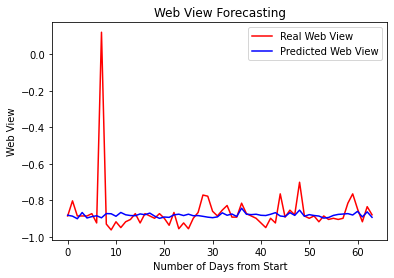

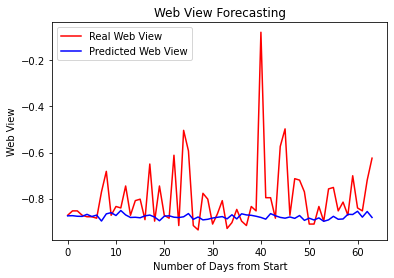

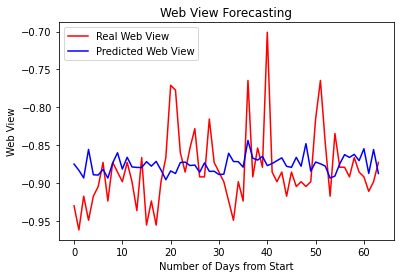

In [131]:
for x, y in train_data_multi.take(3):
    plt.figure
    plt.plot(np.expm1(y[0]), color = 'red', label = 'Real Web View')
    plt.plot(np.expm1(multi_step_model.predict(x)[0]), color = 'blue', label = 'Predicted Web View')
    plt.title('Web View Forecasting')
    plt.xlabel('Number of Days from Start')
    plt.ylabel('Web View')
    plt.legend()
    plt.show()

# Mine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import gc
import seaborn as sns
from datetime import datetime
from datetime import date
import tensorflow as tf
# tf.compat.v1.enable_eager_execution()
from tensorflow import keras

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model

from tensorflow.keras.layers import MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import concatenate,LSTM
from tensorflow.keras.layers import Multiply,Dropout,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding1D, BatchNormalization, Flatten, Conv1D, AveragePooling1D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform

In [2]:
# combined={'feat':combined}
# with open('combined.pickle', 'wb') as handle:
#      pickle.dump(combined, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
import pickle

with open('combined.pickle', 'rb') as handle:
    combined = pickle.load(handle)

In [3]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step) # step used here.
    data.append(dataset[indices])

    if single_step: # single_step used here.
      labels.append(target[i+target_size]) 
    else:
      
      labels.append(target[i:i+target_size]) 
 
  return np.array(data), np.array(labels)
x_train_multi, y_train_multi = multivariate_data(combined['feat'][1],combined['feat'][:, :,0][1], 366,None, 100,64,1,single_step=False)
x,lags=x_train_multi[:,:,:5],x_train_multi[:,:,5:]
print(x.shape)
print(lags.shape)
print(y_train_multi.shape)

(273, 100, 5)
(273, 100, 906)
(273, 64)


In [4]:
def gen(x=x,y=y_train_multi,z=lags,batch_size=64):
    batch=0
    days=[]
    forecast=[]
    lags=[]
    for i,j,k in zip(x,y,z):
        try:
            days.append(i)
            forecast.append(j)
            lags.append(k)
            batch+=1
            if batch==batch_size:
                yield {"days":np.array(days,dtype=np.float32),"lags":np.array(lags,dtype=np.float32)},{"target":np.array(forecast,dtype=np.float32)}
            
                days=[]
                forecast=[]
                lags=[]
                batch=0
         
        except Exception as e:
                import traceback
              
                traceback.print_exc()
                continue
dataset=tf.data.Dataset.from_generator(gen,output_types=({"days":tf.float32,'lags':tf.float32},{"target":tf.float32}))
# dataset.shuffle(buffer_size=1000).cache()
for i in dataset:
    print(i[0]['days'].shape)
    print(i[0]['lags'].shape)
    print(i[1]['target'].shape)
    break

(64, 100, 5)
(64, 100, 906)
(64, 64)


In [5]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns encoder-outputs,encoder_final_state_h,encoder_final_state_c
    '''

    def __init__(self,lstm_size):
        super().__init__()
        #Initialize Embedding layer
        self.lstm_units=lstm_size
     

    def build(self,input_shape):
          
        self.lstm=tf.keras.layers.LSTM(self.lstm_units, return_state=True, return_sequences=True, name="Encoder_LSTM",dropout=.2)
    def call(self,input_sequence,training=True):
     

     
        
       
        
        
        self.lstm_output, self.state_h,self.state_c = self.lstm(input_sequence)
        
#         time_first = tf.transpose(input_sequence, [1, 0, 2])
#         rnn_time_input = time_first
#          # [batch, time, features] -> [time, batch, features]
#         if self.transpose_output:
#             rnn_out = tf.transpose(self.lstm_output, [1, 0, 2])
#         compressed=Dense(64,activation='relu')(rnn_out)
        
        return  self.lstm_output, self.state_h,self.state_c
      

    
    def initialize_states(self,batch_size):
      '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state shape is [32,lstm_units], cell state shape is [32,lstm_units]
      '''
    
    
    
    
      self.state_h=tf.zeros((batch_size,self.lstm_units))
      self.state_c=tf.zeros((batch_size,self.lstm_units))
      return self.state_h,self.state_c

In [6]:
enc=Encoder(32)
rnn_out,h,c=enc(i[0]['days'])
print("rnn shape",rnn_out.shape , "batch, time,lstm units")
print(h.shape,c.shape)

rnn shape (64, 100, 32) batch, time,lstm units
(64, 32) (64, 32)


In [7]:
class Attention(tf.keras.layers.Layer):
    def __init__(self,scoring_function, att_units):
        super().__init__()
        self.scoring_function=scoring_function
   
        if self.scoring_function=='dot':
      
            pass
         
        if scoring_function == 'general':
     
            self.w=Dense(att_units)
        elif scoring_function == 'concat':
      
            self.w1=Dense(att_units)
            self.w2=Dense(att_units)
            self.V=Dense(1)
        
        
        
    def call(self,decoder_hidden_state,encoder_output):
        
        
        if self.scoring_function == 'dot':
        # Implement Dot score function here
            
            
            query_with_time_axis = tf.expand_dims(decoder_hidden_state,1)         
            
          
            score=tf.keras.layers.Dot(axes=2)([encoder_output,query_with_time_axis])     
                                                                                   
            attention_weights = tf.nn.softmax(score, axis=1)

            
            context_vector = attention_weights * encoder_output
            context_vector = tf.reduce_sum(context_vector, axis=1)
            
        elif self.scoring_function == 'general':
        # Implement General score function here
            query_with_time_axis = tf.expand_dims(decoder_hidden_state, 1)
            
            w=self.w(query_with_time_axis)                                          #shape(batchsize,1,att_units)
         
            score=tf.keras.layers.Dot(axes=2)([encoder_output,w])                   # axis =2 means (10,att_units)*(att_units,1)
            
            attention_weights = tf.nn.softmax(score, axis=1)

            
            context_vector = attention_weights * encoder_output
            context_vector = tf.reduce_sum(context_vector, axis=1)
            
        elif self.scoring_function == 'concat':
        # Implement General score function here
            query_with_time_axis = tf.expand_dims(decoder_hidden_state, 1)
            
            score = self.V(tf.nn.tanh(self.w1(encoder_output) + self.w2(query_with_time_axis)))
            
          
            
            attention_weights = tf.nn.softmax(score, axis=1)

            
            context_vector = attention_weights * encoder_output
            context_vector = tf.reduce_sum(context_vector, axis=1)


        return context_vector, attention_weights

In [8]:
class finger_print(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.c11 = Conv1D( filters=16, kernel_size=7, activation=tf.nn.relu, padding='same')
        self.c12 = Conv1D(filters=16, kernel_size=3, activation=tf.nn.relu, padding='same')
        self.pool1 = MaxPooling1D(2, 2, padding='same')
        self.c21 = Conv1D( filters=32, kernel_size=3, activation=tf.nn.relu, padding='same')
        self.c22 = Conv1D( filters=32, kernel_size=3, activation=tf.nn.relu, padding='same')
        self.pool2 =MaxPooling1D( 2, 2, padding='same')
        self.c31 = Conv1D( filters=64, kernel_size=3, activation=tf.nn.relu, padding='same')
        self.c32 =Conv1D(filters=64, kernel_size=3, activation=tf.nn.relu, padding='same')
        self.pool3 = MaxPooling1D( 2, 2, padding='same')
        self.d1=Dense(512,activation='relu')
        self.d2=Dense(64,activation='relu')
    def call(self,embed):
        c11 = self.c11(embed)
        c12 = self.c12(c11)
        pool1 = self.pool1(c12)
        c21 =  self.c21 (pool1)
        c22 =self.c22 (c21)
        pool2 =self.pool2(c22)
        c31 = self.c31 (pool2)
        c32 = self.c32(c31)
        pool3 = self.pool3(c32)
        dims = pool3.shape.dims
        embed = tf.reshape(pool3, [-1, dims[1].value * dims[2].value])
        d1= self.d1(embed)
        d2= self.d2(d1)
        return d2

In [9]:
class OneStepDecoder(tf.keras.Model):
  def __init__(self,days, dec_units ,score_fun ,att_units):
    
      # Initialize decoder embedding layer, LSTM and any other objects needed
        super().__init__()
   
        self.attention=Attention(score_fun,att_units)
        self.lstm=LSTM(dec_units, return_state=True, return_sequences=True, name="osd_LSTM")
        self.dense=Dense(days)
  def call(self,input_to_decoder, encoder_output, state_h,state_c):

    embed=input_to_decoder
    
    context_vec,weights=self.attention(state_h,encoder_output)
  
    concat=Concatenate(axis=2)([tf.expand_dims(embed,1),tf.expand_dims(context_vec,1)])
    
    
    output_lstm,h,c=self.lstm(concat,initial_state=[state_h,state_c])
    
    output_lstm = tf.reshape(output_lstm, (-1, output_lstm.shape[2]))

    output=self.dense(output_lstm)
  
    
    
    return output,h,c,weights,context_vec
    
    

In [10]:
finger=finger_print()
printt=finger(i[0]['lags'])
print(printt.shape)

(64, 64)


(64, 32)
(64, 64)


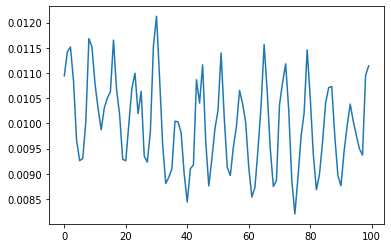

In [11]:
step=OneStepDecoder(64,32,'general',32)
output,h,c,weights,context_vec=step(printt,rnn_out,h,c)
print(context_vec.shape)
print(output.shape)
plt.plot(weights[1])

In [12]:
class Decoder(tf.keras.Model):
    def __init__(self,days, dec_units ,score_fun ,att_units):
      #Intialize necessary variables and create an object from the class onestepdecoder
        super().__init__()
        self.one=OneStepDecoder(days, dec_units ,score_fun ,att_units)
    def call(self, input_to_decoder,encoder_output,decoder_hidden_state,decoder_cell_state ):
        
        #Initialize an empty Tensor array, that will store the outputs at each and every time step
        #Create a tensor array as shown in the reference notebook
        
        #Iterate till the length of the decoder input
            # Call onestepdecoder for each token in decoder_input
            # Store the output in tensorarray
        # Return the tensor array
        
        all_outputs=tf.TensorArray(tf.float32,size=input_to_decoder.shape[1],name="output")
        for timestamp in range(input_to_decoder.shape[1]):

            output,decoder_hidden_state,decoder_cell_state,attention_weights,context_vector=self.one(input_to_decoder[:,timestamp:timestamp+1], encoder_output, decoder_hidden_state,decoder_cell_state)
            
          
            all_outputs=all_outputs.write(timestamp,output)
            
        all_outputs=tf.transpose(all_outputs.stack(),[1,0,2])
       
        
#         x=100*tf.math.sigmoid(x)
        return all_outputs

In [13]:
d=Decoder(64,32,'general',32)
out=d(printt,rnn_out,h,c)
out.shape

TensorShape([64, 64, 64])

In [14]:
class encoder_decoder(tf.keras.Model):
  def __init__(self,days, dec_units ,score_fun ,att_units):
    #Intialize objects from encoder decoder
    super().__init__()
    self.encoder=Encoder(dec_units)
    self.decoder=Decoder(days, dec_units ,score_fun ,att_units)
    self.finger_print=finger_print()
  def call(self,data):
    encoder_out,h,c=self.encoder(data[0])
    
    embed=self.finger_print(data[1])
    
    output=self.decoder(embed, encoder_out,h, c)
    return output

In [23]:
days =Input(shape=(100,5),name='days')
lags=Input(shape=(100,906),name='lags')
encdnc=encoder_decoder(64,32,'concat',32)
x=encdnc([days,lags])

x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(2,2)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(2,2)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(2,2)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3,2)(x)
x=tf.squeeze(x,axis=1)
out=Dense(64,activation='relu',name='target')(x)
model=Model(inputs={'days':days,'lags':lags},outputs={'target':out})
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 days (InputLayer)              [(None, 100, 5)]     0           []                               
                                                                                                  
 lags (InputLayer)              [(None, 100, 906)]   0           []                               
                                                                                                  
 encoder_decoder_1 (encoder_dec  (None, 64, 64)      602401      ['days[0][0]',                   
 oder)                                                            'lags[0][0]']                   
                                                                                                  
 conv1d_22 (Conv1D)             (None, 62, 64)       12352       ['encoder_decoder_1[0][0]']

model=encoder_decoder(64,32,'concat',32)


out=model(i[0])
loss=tf.keras.losses.MeanSquaredError()(out['target'], i[1]['target'])
print(loss.numpy())

In [24]:
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(.001))

In [25]:
dataset=dataset.shuffle(buffer_size=300).cache()


In [26]:
log_dir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)




filepath="encoder_decoder/1st_model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')


earlystop = tf.keras.callbacks.EarlyStopping(monitor = 'loss', 
                            mode="min",
                            min_delta = 0, 
                            patience = 10,
                            verbose = 1,
                            restore_best_weights = True)


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor = 0.1, patience = 5, verbose = 1, min_delta = 0.0001)

def decay(epoch):
    eta=.001

    eta=eta*(1-.10)**epoch
    return eta
        

rate = tf.keras.callbacks.LearningRateScheduler(decay,verbose=1)

# class TerminateOnBaseline(tf.keras.callbacks):
#     """Callback that terminates training when either acc or val_acc reaches a specified baseline
#     """
#     def __init__(self, monitor='acc', baseline=0.9):
#         super(TerminateOnBaseline, self).__init__()
#         self.monitor = monitor
#         self.baseline = baseline

#     def on_epoch_end(self, epoch, logs=None):
#         logs = logs or {}
#         metric = logs.get(self.monitor)
#         if metric is not None:
#             if metric <= self.baseline:
#                 print('Epoch %d: Reached baseline, terminating training' % (epoch))
#                 self.model.stop_training = True

# terminate= TerminateOnBaseline(monitor='loss', baseline=0.1)


model.fit(dataset.repeat().shuffle(buffer_size=500).cache(),steps_per_epoch=100, epochs=50,callbacks=[tensorboard_callback,earlystop,reduce_lr])

Epoch 1/50
100/100 [==============================] - 126s 392ms/step - loss: 0.4975 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - 41s 411ms/step - loss: 0.3450 - lr: 0.0010
Epoch 3/50
100/100 [==============================] - 40s 399ms/step - loss: 0.3127 - lr: 0.0010
Epoch 4/50
100/100 [==============================] - 39s 392ms/step - loss: 0.3670 - lr: 0.0010
Epoch 5/50
100/100 [==============================] - 39s 395ms/step - loss: 0.2947 - lr: 0.0010
Epoch 6/50
100/100 [==============================] - 39s 391ms/step - loss: 0.2753 - lr: 0.0010
Epoch 7/50
100/100 [==============================] - 40s 395ms/step - loss: 0.3146 - lr: 0.0010
Epoch 8/50
100/100 [==============================] - 40s 402ms/step - loss: 0.2879 - lr: 0.0010
Epoch 9/50
100/100 [==============================] - 41s 407ms/step - loss: 0.2635 - lr: 0.0010
Epoch 10/50
100/100 [==============================] - 39s 392ms/step - loss: 0.3301 - lr: 0.0010
Epoch 11/50
100/100 [=======

In [27]:
model.save_weights('lagged_attention.h5')

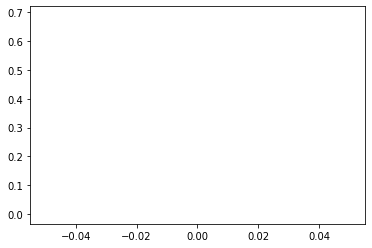

In [34]:
plt.plot(np.expm1(model.predict({'days':x['days'][0][np.newaxis,...],'lags':x['lags'][0][np.newaxis,...]})['target']), color = 'blue', label = 'Predicted Web View')

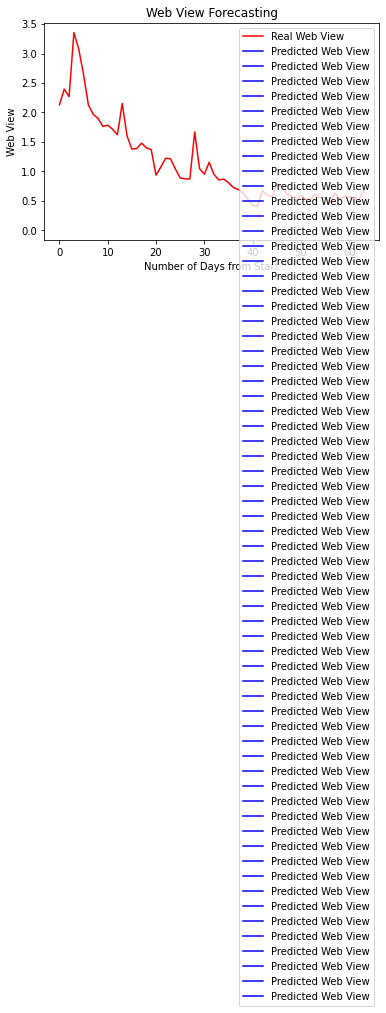

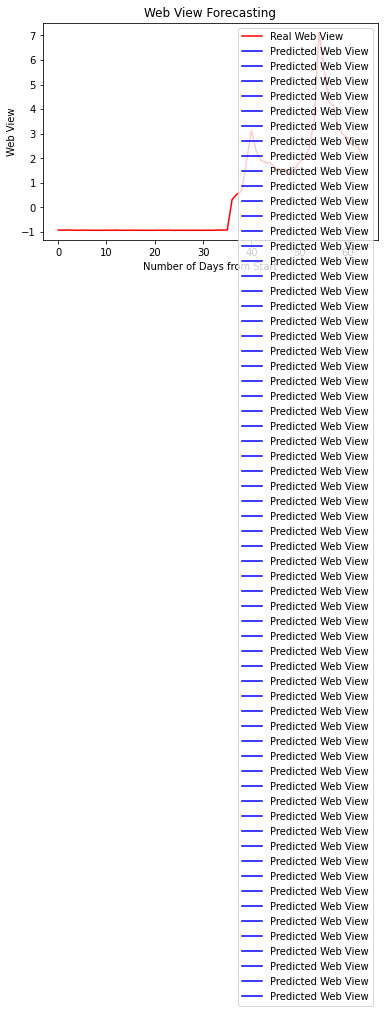

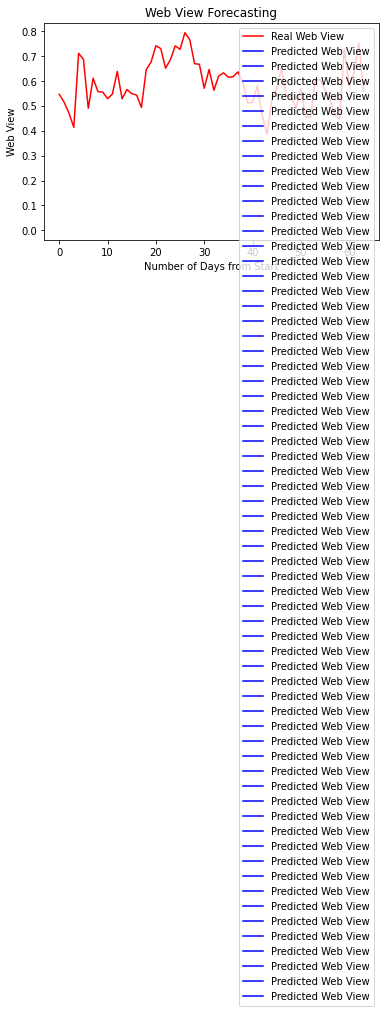

In [32]:
for x, y in dataset.take(3):
    plt.figure
    plt.plot(np.expm1(y['target'][0]), color = 'red', label = 'Real Web View')
    plt.plot(np.expm1(model.predict({'days':x['days'][0][np.newaxis,...],'lags':x['lags'][0][np.newaxis,...]})['target']), color = 'blue', label = 'Predicted Web View')
    plt.title('Web View Forecasting')
    plt.xlabel('Number of Days from Start')
    plt.ylabel('Web View')
    plt.legend()
    plt.show()

# Gradient Tape

In [ ]:
cpkt_dir = 'checkpoints/'
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
save_iter=100
iter = 0
loss_hist = []
loss=tf.keras.losses.MeanSquaredError()
# for x_batch in dataset.shuffle(640).repeat():

#     with tf.GradientTape() as tape:

#         # forward-prop
#         out= model(x_batch[0])

#         # loss
        
#         model_loss = loss(out, x_batch[1]['target'])

#     # backward-prop
#     grads = tape.gradient(model_loss,
#                           model.trainable_variables)
#     optimizer.apply_gradients(zip(grads,
#                                   model.trainable_variables))
#     if iter ==100:
#         print(iter,  np.mean(np.array(loss_hist)))
#     if iter%10==10:
#         break

#     iter += 1
#     loss_hist.append(model_loss.numpy())



    # save
#     if iter % save_iter == 0:
#         model.save_weights(cpkt_dir + 'concat')

#         with open('loss.txt', ['a' if load_models else 'w'][0]) as file:
#             for line in loss_hist:
#                 [file.write(str(i) + ' ') for i in line]
#                 file.write('\n')
#         loss_hist = []
import sys
def step(batch):
# keep track of our gradients
    with tf.GradientTape() as tape:
# make a prediction using the model and then calculate the
# loss
        pred = model(batch[0])
    
        model_loss = loss( batch[1]['target'],pred['target'])
# calculate the gradients using our tape and then update the
# model weights
        grads = tape.gradient(model_loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

    
EPOCHS=1
import time
# loop over the number of epochs
for epoch in range(0, EPOCHS):
# show the current epoch number
    print("[INFO] starting epoch {}/{}...".format(
    epoch + 1, EPOCHS), end="")
    sys.stdout.flush()
    epochStart = time.time()
# loop over the data in batch size increments
    for batch in dataset.shuffle(640).repeat().catche() :
    # determine starting and ending slice indexes for the current
    # batch
       
    # take a step
        step(batch)
# show timing information for the epoch
    epochEnd = time.time()
    elapsed = (epochEnd - epochStart) / 60.0
    print("took {:.4} minutes".format(elapsed))